In [8]:
import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import datetime
import calendar
from scipy.interpolate import interp1d
import scipy
from scipy import interpolate
from numpy import nan

In [9]:
#read meteorological data 
met_data = pd.read_csv(r'C:\Users\visan\Downloads\dwd_metdata_airport_bremen_2020_new.DAT',delim_whitespace = True,header =13,usecols = [0,1,2,3,4,5,6])
# convert Pressure (hPa) to Pressure(Pa)
Pressure = met_data['pressure'] *100
met_data['pressure'] = Pressure
met_data

date      time  dayofyear1993  pressure  temperature  wind_speed  \
0      01.01.2020  00:00:00      9862.0000  103460.0        271.8         1.1   
1      01.01.2020  00:10:00      9862.0069  103440.0        272.1         1.5   
2      01.01.2020  00:20:00      9862.0139  103440.0        271.5         1.7   
3      01.01.2020  00:30:00      9862.0208  103440.0        272.1         0.8   
4      01.01.2020  00:40:00      9862.0278  103440.0        271.6         1.4   
5      01.01.2020  00:50:00      9862.0347  103440.0        272.3         0.8   
6      01.01.2020  01:00:00      9862.0417  103430.0        272.6         0.6   
7      01.01.2020  01:10:00      9862.0486  103420.0        271.3         1.0   
8      01.01.2020  01:20:00      9862.0556  103410.0        271.0         1.0   
9      01.01.2020  01:30:00      9862.0625  103410.0        271.0         0.5   
10     01.01.2020  01:40:00      9862.0694  103400.0        271.1         0.9   
11     01.01.2020  01:50:00      9862.0764  103400.0        271.0         0.6   
12     01.01.2020  02:00:00      9862.0833  103400.0        270.9         0.3   
13     01.01.2020  02:10:00      9862.0903  103380.0        271.0         0.5   
14     01.01.2020  02:20:00      9862.0972  103390.0        271.0         0.3   
15     01.01.2020  02:30:00      9862.1042  103380.0        270.3         0.6   
16     01.01.2020  02:40:00      9862.1111  103360.0        269.9         0.3   
17     01.01.2020  02:50:00      9862.1181  103360.0        269.9         0.6   
18     01.01.2020  03:00:00      9862.1250  103370.0        270.3         0.9   
19     01.01.2020  03:10:00      9862.1319  103370.0        270.4         0.3   
20     01.01.2020  03:20:00      9862.1389  103380.0        270.5         0.4   
21     01.01.2020  03:30:00      9862.1458  103390.0        270.8         0.5   
22     01.01.2020  03:40:00      9862.1528  103380.0        270.6         0.2   
23     01.01.2020  03:50:00      9862.1597  103390.0        270.5         0.3   
24     01.01.2020  04:00:00      9862.1667  103370.0        270.0         0.4   
25     01.01.2020  04:10:00      9862.1736  103370.0        269.6         0.9   
26     01.01.2020  04:20:00      9862.1806  103370.0        269.6         1.4   
27     01.01.2020  04:30:00      9862.1875  103350.0        270.0         0.8   
28     01.01.2020  04:40:00      9862.1944  103360.0        270.3         0.7   
29     01.01.2020  04:50:00      9862.2014  103360.0        270.5         0.7   
...           ...       ...            ...       ...          ...         ...   
52674  31.12.2020  19:00:00     10227.7917  100270.0        275.5         2.1   
52675  31.12.2020  19:10:00     10227.7986  100270.0        275.0         2.7   
52676  31.12.2020  19:20:00     10227.8056  100290.0        274.5         2.6   
52677  31.12.2020  19:30:00     10227.8125  100290.0        274.5         2.1   
52678  31.12.2020  19:40:00     10227.8194  100300.0        274.1         2.7   
52679  31.12.2020  19:50:00     10227.8264  100300.0        274.1         2.6   
52680  31.12.2020  20:00:00     10227.8333  100310.0        273.9         2.5   
52681  31.12.2020  20:10:00     10227.8403  100320.0        274.0         2.1   
52682  31.12.2020  20:20:00     10227.8472  100320.0        274.0         1.8   
52683  31.12.2020  20:30:00     10227.8542  100330.0        274.0         1.9   
52684  31.12.2020  20:40:00     10227.8611  100340.0        274.3         1.7   
52685  31.12.2020  20:50:00     10227.8681  100350.0        274.4         1.4   
52686  31.12.2020  21:00:00     10227.8750  100350.0        274.4         2.1   
52687  31.12.2020  21:10:00     10227.8819  100360.0        274.5         2.2   
52688  31.12.2020  21:20:00     10227.8889  100360.0        274.6         2.3   
52689  31.12.2020  21:30:00     10227.8958  100360.0        274.9         2.3   
52690  31.12.2020  21:40:00     10227.9028  100370.0        274.8         2.4   
52691  31.12.2020  21:50:00     10227.9097  

In [10]:
met_data['wind_speed'].max()

18.3

In [11]:
met_data['wind_direction'].max()

360

In [12]:
#read horizon_data

horizon_data=pd.DataFrame()
horizon_data_day=pd.DataFrame()
folderpath = os.path.dirname(r'C:\Users\visan\Downloads\horizon_2020\\')
horizon_file_name = '??????KK.NO2_vis_sync'
horizon_filepaths = glob.glob(os.path.join(folderpath,horizon_file_name))

# read all files into one big data frame

for i in horizon_filepaths:
    horizon_data_day = pd.read_csv(i,usecols=[0,1,4,6,7,13,15,19], sep ='\s+', header = 63)# read all columns

    # add information on day of week and month as additional columns
    file=os.path.basename(str(i))
    day=str(file[4]) + str(file[5])
    month=str(file[2]) + str(file[3])
    day_date = datetime.date(2020, int(month), int(day)) 
    day_name=day_date.strftime("%A")
    horizon_data_day['month']=int(month)
    horizon_data_day['day-of-week']=day_name
    horizon_data_day['day-of-week-no']=int(day_date.strftime("%w"))  
    # add current day to data for full year 
    horizon_data = horizon_data.append(horizon_data_day, ignore_index=True)
    
    print(horizon_data)
#rename a few columns for convenience
horizon_data.rename(columns={'a[NO2]':'NO2'}, inplace=True)    
horizon_data.rename(columns={'a[O4]':'O4'}, inplace=True)
horizon_data.rename(columns={'a[H2O]':'H2O'}, inplace=True)
horizon_data.rename(columns={'*day-of-year-1993':'dayofyear1993'}, inplace=True)


     *day-of-year-1993       time  solar-azimuth-angle  viewing-azimuth-angle  \
0          9862.348520   8.364470               138.00                  130.0   
1          9862.348923   8.374150               138.12                  140.0   
2          9862.349326   8.383833               138.24                  150.0   
3          9862.349730   8.393519               138.36                  160.0   
4          9862.350133   8.403200               138.48                  170.0   
5          9862.350547   8.413137               138.61                  180.0   
6          9862.350951   8.422819               138.73                  190.0   
7          9862.351354   8.432500               138.85                  200.0   
8          9862.351758   8.442184               138.97                  210.0   
9          9862.352161   8.451867               139.09                  220.0   
10         9862.352564   8.461547               139.21                  230.0   
11         9862.352968   8.4

      *day-of-year-1993       time  solar-azimuth-angle  \
0           9862.348520   8.364470               138.00   
1           9862.348923   8.374150               138.12   
2           9862.349326   8.383833               138.24   
3           9862.349730   8.393519               138.36   
4           9862.350133   8.403200               138.48   
5           9862.350547   8.413137               138.61   
6           9862.350951   8.422819               138.73   
7           9862.351354   8.432500               138.85   
8           9862.351758   8.442184               138.97   
9           9862.352161   8.451867               139.09   
10          9862.352564   8.461547               139.21   
11          9862.352968   8.471230               139.33   
12          9862.353371   8.480911               139.45   
13          9862.353786   8.490852               139.58   
14          9862.354189   8.500533               139.70   
15          9862.354592   8.510214               139.82 

      *day-of-year-1993       time  solar-azimuth-angle  \
0           9862.348520   8.364470               138.00   
1           9862.348923   8.374150               138.12   
2           9862.349326   8.383833               138.24   
3           9862.349730   8.393519               138.36   
4           9862.350133   8.403200               138.48   
5           9862.350547   8.413137               138.61   
6           9862.350951   8.422819               138.73   
7           9862.351354   8.432500               138.85   
8           9862.351758   8.442184               138.97   
9           9862.352161   8.451867               139.09   
10          9862.352564   8.461547               139.21   
11          9862.352968   8.471230               139.33   
12          9862.353371   8.480911               139.45   
13          9862.353786   8.490852               139.58   
14          9862.354189   8.500533               139.70   
15          9862.354592   8.510214               139.82 

      *day-of-year-1993       time  solar-azimuth-angle  \
0           9862.348520   8.364470               138.00   
1           9862.348923   8.374150               138.12   
2           9862.349326   8.383833               138.24   
3           9862.349730   8.393519               138.36   
4           9862.350133   8.403200               138.48   
5           9862.350547   8.413137               138.61   
6           9862.350951   8.422819               138.73   
7           9862.351354   8.432500               138.85   
8           9862.351758   8.442184               138.97   
9           9862.352161   8.451867               139.09   
10          9862.352564   8.461547               139.21   
11          9862.352968   8.471230               139.33   
12          9862.353371   8.480911               139.45   
13          9862.353786   8.490852               139.58   
14          9862.354189   8.500533               139.70   
15          9862.354592   8.510214               139.82 

      *day-of-year-1993       time  solar-azimuth-angle  \
0           9862.348520   8.364470               138.00   
1           9862.348923   8.374150               138.12   
2           9862.349326   8.383833               138.24   
3           9862.349730   8.393519               138.36   
4           9862.350133   8.403200               138.48   
5           9862.350547   8.413137               138.61   
6           9862.350951   8.422819               138.73   
7           9862.351354   8.432500               138.85   
8           9862.351758   8.442184               138.97   
9           9862.352161   8.451867               139.09   
10          9862.352564   8.461547               139.21   
11          9862.352968   8.471230               139.33   
12          9862.353371   8.480911               139.45   
13          9862.353786   8.490852               139.58   
14          9862.354189   8.500533               139.70   
15          9862.354592   8.510214               139.82 

      *day-of-year-1993       time  solar-azimuth-angle  \
0           9862.348520   8.364470               138.00   
1           9862.348923   8.374150               138.12   
2           9862.349326   8.383833               138.24   
3           9862.349730   8.393519               138.36   
4           9862.350133   8.403200               138.48   
5           9862.350547   8.413137               138.61   
6           9862.350951   8.422819               138.73   
7           9862.351354   8.432500               138.85   
8           9862.351758   8.442184               138.97   
9           9862.352161   8.451867               139.09   
10          9862.352564   8.461547               139.21   
11          9862.352968   8.471230               139.33   
12          9862.353371   8.480911               139.45   
13          9862.353786   8.490852               139.58   
14          9862.354189   8.500533               139.70   
15          9862.354592   8.510214               139.82 

       *day-of-year-1993       time  solar-azimuth-angle  \
0            9862.348520   8.364470               138.00   
1            9862.348923   8.374150               138.12   
2            9862.349326   8.383833               138.24   
3            9862.349730   8.393519               138.36   
4            9862.350133   8.403200               138.48   
5            9862.350547   8.413137               138.61   
6            9862.350951   8.422819               138.73   
7            9862.351354   8.432500               138.85   
8            9862.351758   8.442184               138.97   
9            9862.352161   8.451867               139.09   
10           9862.352564   8.461547               139.21   
11           9862.352968   8.471230               139.33   
12           9862.353371   8.480911               139.45   
13           9862.353786   8.490852               139.58   
14           9862.354189   8.500533               139.70   
15           9862.354592   8.510214     

       *day-of-year-1993       time  solar-azimuth-angle  \
0            9862.348520   8.364470               138.00   
1            9862.348923   8.374150               138.12   
2            9862.349326   8.383833               138.24   
3            9862.349730   8.393519               138.36   
4            9862.350133   8.403200               138.48   
5            9862.350547   8.413137               138.61   
6            9862.350951   8.422819               138.73   
7            9862.351354   8.432500               138.85   
8            9862.351758   8.442184               138.97   
9            9862.352161   8.451867               139.09   
10           9862.352564   8.461547               139.21   
11           9862.352968   8.471230               139.33   
12           9862.353371   8.480911               139.45   
13           9862.353786   8.490852               139.58   
14           9862.354189   8.500533               139.70   
15           9862.354592   8.510214     

       *day-of-year-1993       time  solar-azimuth-angle  \
0            9862.348520   8.364470               138.00   
1            9862.348923   8.374150               138.12   
2            9862.349326   8.383833               138.24   
3            9862.349730   8.393519               138.36   
4            9862.350133   8.403200               138.48   
5            9862.350547   8.413137               138.61   
6            9862.350951   8.422819               138.73   
7            9862.351354   8.432500               138.85   
8            9862.351758   8.442184               138.97   
9            9862.352161   8.451867               139.09   
10           9862.352564   8.461547               139.21   
11           9862.352968   8.471230               139.33   
12           9862.353371   8.480911               139.45   
13           9862.353786   8.490852               139.58   
14           9862.354189   8.500533               139.70   
15           9862.354592   8.510214     

       *day-of-year-1993       time  solar-azimuth-angle  \
0            9862.348520   8.364470               138.00   
1            9862.348923   8.374150               138.12   
2            9862.349326   8.383833               138.24   
3            9862.349730   8.393519               138.36   
4            9862.350133   8.403200               138.48   
5            9862.350547   8.413137               138.61   
6            9862.350951   8.422819               138.73   
7            9862.351354   8.432500               138.85   
8            9862.351758   8.442184               138.97   
9            9862.352161   8.451867               139.09   
10           9862.352564   8.461547               139.21   
11           9862.352968   8.471230               139.33   
12           9862.353371   8.480911               139.45   
13           9862.353786   8.490852               139.58   
14           9862.354189   8.500533               139.70   
15           9862.354592   8.510214     

       *day-of-year-1993       time  solar-azimuth-angle  \
0            9862.348520   8.364470               138.00   
1            9862.348923   8.374150               138.12   
2            9862.349326   8.383833               138.24   
3            9862.349730   8.393519               138.36   
4            9862.350133   8.403200               138.48   
5            9862.350547   8.413137               138.61   
6            9862.350951   8.422819               138.73   
7            9862.351354   8.432500               138.85   
8            9862.351758   8.442184               138.97   
9            9862.352161   8.451867               139.09   
10           9862.352564   8.461547               139.21   
11           9862.352968   8.471230               139.33   
12           9862.353371   8.480911               139.45   
13           9862.353786   8.490852               139.58   
14           9862.354189   8.500533               139.70   
15           9862.354592   8.510214     

[20877 rows x 11 columns]
       *day-of-year-1993       time  solar-azimuth-angle  \
0            9862.348520   8.364470               138.00   
1            9862.348923   8.374150               138.12   
2            9862.349326   8.383833               138.24   
3            9862.349730   8.393519               138.36   
4            9862.350133   8.403200               138.48   
5            9862.350547   8.413137               138.61   
6            9862.350951   8.422819               138.73   
7            9862.351354   8.432500               138.85   
8            9862.351758   8.442184               138.97   
9            9862.352161   8.451867               139.09   
10           9862.352564   8.461547               139.21   
11           9862.352968   8.471230               139.33   
12           9862.353371   8.480911               139.45   
13           9862.353786   8.490852               139.58   
14           9862.354189   8.500533               139.70   
15           9

       *day-of-year-1993       time  solar-azimuth-angle  \
0            9862.348520   8.364470               138.00   
1            9862.348923   8.374150               138.12   
2            9862.349326   8.383833               138.24   
3            9862.349730   8.393519               138.36   
4            9862.350133   8.403200               138.48   
5            9862.350547   8.413137               138.61   
6            9862.350951   8.422819               138.73   
7            9862.351354   8.432500               138.85   
8            9862.351758   8.442184               138.97   
9            9862.352161   8.451867               139.09   
10           9862.352564   8.461547               139.21   
11           9862.352968   8.471230               139.33   
12           9862.353371   8.480911               139.45   
13           9862.353786   8.490852               139.58   
14           9862.354189   8.500533               139.70   
15           9862.354592   8.510214     

       *day-of-year-1993       time  solar-azimuth-angle  \
0            9862.348520   8.364470               138.00   
1            9862.348923   8.374150               138.12   
2            9862.349326   8.383833               138.24   
3            9862.349730   8.393519               138.36   
4            9862.350133   8.403200               138.48   
5            9862.350547   8.413137               138.61   
6            9862.350951   8.422819               138.73   
7            9862.351354   8.432500               138.85   
8            9862.351758   8.442184               138.97   
9            9862.352161   8.451867               139.09   
10           9862.352564   8.461547               139.21   
11           9862.352968   8.471230               139.33   
12           9862.353371   8.480911               139.45   
13           9862.353786   8.490852               139.58   
14           9862.354189   8.500533               139.70   
15           9862.354592   8.510214     

       *day-of-year-1993       time  solar-azimuth-angle  \
0            9862.348520   8.364470               138.00   
1            9862.348923   8.374150               138.12   
2            9862.349326   8.383833               138.24   
3            9862.349730   8.393519               138.36   
4            9862.350133   8.403200               138.48   
5            9862.350547   8.413137               138.61   
6            9862.350951   8.422819               138.73   
7            9862.351354   8.432500               138.85   
8            9862.351758   8.442184               138.97   
9            9862.352161   8.451867               139.09   
10           9862.352564   8.461547               139.21   
11           9862.352968   8.471230               139.33   
12           9862.353371   8.480911               139.45   
13           9862.353786   8.490852               139.58   
14           9862.354189   8.500533               139.70   
15           9862.354592   8.510214     

       *day-of-year-1993       time  solar-azimuth-angle  \
0            9862.348520   8.364470               138.00   
1            9862.348923   8.374150               138.12   
2            9862.349326   8.383833               138.24   
3            9862.349730   8.393519               138.36   
4            9862.350133   8.403200               138.48   
5            9862.350547   8.413137               138.61   
6            9862.350951   8.422819               138.73   
7            9862.351354   8.432500               138.85   
8            9862.351758   8.442184               138.97   
9            9862.352161   8.451867               139.09   
10           9862.352564   8.461547               139.21   
11           9862.352968   8.471230               139.33   
12           9862.353371   8.480911               139.45   
13           9862.353786   8.490852               139.58   
14           9862.354189   8.500533               139.70   
15           9862.354592   8.510214     

       *day-of-year-1993       time  solar-azimuth-angle  \
0            9862.348520   8.364470               138.00   
1            9862.348923   8.374150               138.12   
2            9862.349326   8.383833               138.24   
3            9862.349730   8.393519               138.36   
4            9862.350133   8.403200               138.48   
5            9862.350547   8.413137               138.61   
6            9862.350951   8.422819               138.73   
7            9862.351354   8.432500               138.85   
8            9862.351758   8.442184               138.97   
9            9862.352161   8.451867               139.09   
10           9862.352564   8.461547               139.21   
11           9862.352968   8.471230               139.33   
12           9862.353371   8.480911               139.45   
13           9862.353786   8.490852               139.58   
14           9862.354189   8.500533               139.70   
15           9862.354592   8.510214     

       *day-of-year-1993       time  solar-azimuth-angle  \
0            9862.348520   8.364470               138.00   
1            9862.348923   8.374150               138.12   
2            9862.349326   8.383833               138.24   
3            9862.349730   8.393519               138.36   
4            9862.350133   8.403200               138.48   
5            9862.350547   8.413137               138.61   
6            9862.350951   8.422819               138.73   
7            9862.351354   8.432500               138.85   
8            9862.351758   8.442184               138.97   
9            9862.352161   8.451867               139.09   
10           9862.352564   8.461547               139.21   
11           9862.352968   8.471230               139.33   
12           9862.353371   8.480911               139.45   
13           9862.353786   8.490852               139.58   
14           9862.354189   8.500533               139.70   
15           9862.354592   8.510214     

       *day-of-year-1993       time  solar-azimuth-angle  \
0            9862.348520   8.364470               138.00   
1            9862.348923   8.374150               138.12   
2            9862.349326   8.383833               138.24   
3            9862.349730   8.393519               138.36   
4            9862.350133   8.403200               138.48   
5            9862.350547   8.413137               138.61   
6            9862.350951   8.422819               138.73   
7            9862.351354   8.432500               138.85   
8            9862.351758   8.442184               138.97   
9            9862.352161   8.451867               139.09   
10           9862.352564   8.461547               139.21   
11           9862.352968   8.471230               139.33   
12           9862.353371   8.480911               139.45   
13           9862.353786   8.490852               139.58   
14           9862.354189   8.500533               139.70   
15           9862.354592   8.510214     

       *day-of-year-1993       time  solar-azimuth-angle  \
0            9862.348520   8.364470               138.00   
1            9862.348923   8.374150               138.12   
2            9862.349326   8.383833               138.24   
3            9862.349730   8.393519               138.36   
4            9862.350133   8.403200               138.48   
5            9862.350547   8.413137               138.61   
6            9862.350951   8.422819               138.73   
7            9862.351354   8.432500               138.85   
8            9862.351758   8.442184               138.97   
9            9862.352161   8.451867               139.09   
10           9862.352564   8.461547               139.21   
11           9862.352968   8.471230               139.33   
12           9862.353371   8.480911               139.45   
13           9862.353786   8.490852               139.58   
14           9862.354189   8.500533               139.70   
15           9862.354592   8.510214     

       *day-of-year-1993       time  solar-azimuth-angle  \
0            9862.348520   8.364470               138.00   
1            9862.348923   8.374150               138.12   
2            9862.349326   8.383833               138.24   
3            9862.349730   8.393519               138.36   
4            9862.350133   8.403200               138.48   
5            9862.350547   8.413137               138.61   
6            9862.350951   8.422819               138.73   
7            9862.351354   8.432500               138.85   
8            9862.351758   8.442184               138.97   
9            9862.352161   8.451867               139.09   
10           9862.352564   8.461547               139.21   
11           9862.352968   8.471230               139.33   
12           9862.353371   8.480911               139.45   
13           9862.353786   8.490852               139.58   
14           9862.354189   8.500533               139.70   
15           9862.354592   8.510214     

       *day-of-year-1993       time  solar-azimuth-angle  \
0            9862.348520   8.364470               138.00   
1            9862.348923   8.374150               138.12   
2            9862.349326   8.383833               138.24   
3            9862.349730   8.393519               138.36   
4            9862.350133   8.403200               138.48   
5            9862.350547   8.413137               138.61   
6            9862.350951   8.422819               138.73   
7            9862.351354   8.432500               138.85   
8            9862.351758   8.442184               138.97   
9            9862.352161   8.451867               139.09   
10           9862.352564   8.461547               139.21   
11           9862.352968   8.471230               139.33   
12           9862.353371   8.480911               139.45   
13           9862.353786   8.490852               139.58   
14           9862.354189   8.500533               139.70   
15           9862.354592   8.510214     

       *day-of-year-1993       time  solar-azimuth-angle  \
0            9862.348520   8.364470               138.00   
1            9862.348923   8.374150               138.12   
2            9862.349326   8.383833               138.24   
3            9862.349730   8.393519               138.36   
4            9862.350133   8.403200               138.48   
5            9862.350547   8.413137               138.61   
6            9862.350951   8.422819               138.73   
7            9862.351354   8.432500               138.85   
8            9862.351758   8.442184               138.97   
9            9862.352161   8.451867               139.09   
10           9862.352564   8.461547               139.21   
11           9862.352968   8.471230               139.33   
12           9862.353371   8.480911               139.45   
13           9862.353786   8.490852               139.58   
14           9862.354189   8.500533               139.70   
15           9862.354592   8.510214     

       *day-of-year-1993       time  solar-azimuth-angle  \
0            9862.348520   8.364470               138.00   
1            9862.348923   8.374150               138.12   
2            9862.349326   8.383833               138.24   
3            9862.349730   8.393519               138.36   
4            9862.350133   8.403200               138.48   
5            9862.350547   8.413137               138.61   
6            9862.350951   8.422819               138.73   
7            9862.351354   8.432500               138.85   
8            9862.351758   8.442184               138.97   
9            9862.352161   8.451867               139.09   
10           9862.352564   8.461547               139.21   
11           9862.352968   8.471230               139.33   
12           9862.353371   8.480911               139.45   
13           9862.353786   8.490852               139.58   
14           9862.354189   8.500533               139.70   
15           9862.354592   8.510214     

       *day-of-year-1993       time  solar-azimuth-angle  \
0            9862.348520   8.364470               138.00   
1            9862.348923   8.374150               138.12   
2            9862.349326   8.383833               138.24   
3            9862.349730   8.393519               138.36   
4            9862.350133   8.403200               138.48   
5            9862.350547   8.413137               138.61   
6            9862.350951   8.422819               138.73   
7            9862.351354   8.432500               138.85   
8            9862.351758   8.442184               138.97   
9            9862.352161   8.451867               139.09   
10           9862.352564   8.461547               139.21   
11           9862.352968   8.471230               139.33   
12           9862.353371   8.480911               139.45   
13           9862.353786   8.490852               139.58   
14           9862.354189   8.500533               139.70   
15           9862.354592   8.510214     

[59769 rows x 11 columns]
       *day-of-year-1993       time  solar-azimuth-angle  \
0            9862.348520   8.364470               138.00   
1            9862.348923   8.374150               138.12   
2            9862.349326   8.383833               138.24   
3            9862.349730   8.393519               138.36   
4            9862.350133   8.403200               138.48   
5            9862.350547   8.413137               138.61   
6            9862.350951   8.422819               138.73   
7            9862.351354   8.432500               138.85   
8            9862.351758   8.442184               138.97   
9            9862.352161   8.451867               139.09   
10           9862.352564   8.461547               139.21   
11           9862.352968   8.471230               139.33   
12           9862.353371   8.480911               139.45   
13           9862.353786   8.490852               139.58   
14           9862.354189   8.500533               139.70   
15           9

       *day-of-year-1993       time  solar-azimuth-angle  \
0            9862.348520   8.364470               138.00   
1            9862.348923   8.374150               138.12   
2            9862.349326   8.383833               138.24   
3            9862.349730   8.393519               138.36   
4            9862.350133   8.403200               138.48   
5            9862.350547   8.413137               138.61   
6            9862.350951   8.422819               138.73   
7            9862.351354   8.432500               138.85   
8            9862.351758   8.442184               138.97   
9            9862.352161   8.451867               139.09   
10           9862.352564   8.461547               139.21   
11           9862.352968   8.471230               139.33   
12           9862.353371   8.480911               139.45   
13           9862.353786   8.490852               139.58   
14           9862.354189   8.500533               139.70   
15           9862.354592   8.510214     

       *day-of-year-1993       time  solar-azimuth-angle  \
0            9862.348520   8.364470               138.00   
1            9862.348923   8.374150               138.12   
2            9862.349326   8.383833               138.24   
3            9862.349730   8.393519               138.36   
4            9862.350133   8.403200               138.48   
5            9862.350547   8.413137               138.61   
6            9862.350951   8.422819               138.73   
7            9862.351354   8.432500               138.85   
8            9862.351758   8.442184               138.97   
9            9862.352161   8.451867               139.09   
10           9862.352564   8.461547               139.21   
11           9862.352968   8.471230               139.33   
12           9862.353371   8.480911               139.45   
13           9862.353786   8.490852               139.58   
14           9862.354189   8.500533               139.70   
15           9862.354592   8.510214     

       *day-of-year-1993       time  solar-azimuth-angle  \
0            9862.348520   8.364470               138.00   
1            9862.348923   8.374150               138.12   
2            9862.349326   8.383833               138.24   
3            9862.349730   8.393519               138.36   
4            9862.350133   8.403200               138.48   
5            9862.350547   8.413137               138.61   
6            9862.350951   8.422819               138.73   
7            9862.351354   8.432500               138.85   
8            9862.351758   8.442184               138.97   
9            9862.352161   8.451867               139.09   
10           9862.352564   8.461547               139.21   
11           9862.352968   8.471230               139.33   
12           9862.353371   8.480911               139.45   
13           9862.353786   8.490852               139.58   
14           9862.354189   8.500533               139.70   
15           9862.354592   8.510214     

       *day-of-year-1993       time  solar-azimuth-angle  \
0            9862.348520   8.364470               138.00   
1            9862.348923   8.374150               138.12   
2            9862.349326   8.383833               138.24   
3            9862.349730   8.393519               138.36   
4            9862.350133   8.403200               138.48   
5            9862.350547   8.413137               138.61   
6            9862.350951   8.422819               138.73   
7            9862.351354   8.432500               138.85   
8            9862.351758   8.442184               138.97   
9            9862.352161   8.451867               139.09   
10           9862.352564   8.461547               139.21   
11           9862.352968   8.471230               139.33   
12           9862.353371   8.480911               139.45   
13           9862.353786   8.490852               139.58   
14           9862.354189   8.500533               139.70   
15           9862.354592   8.510214     

       *day-of-year-1993       time  solar-azimuth-angle  \
0            9862.348520   8.364470               138.00   
1            9862.348923   8.374150               138.12   
2            9862.349326   8.383833               138.24   
3            9862.349730   8.393519               138.36   
4            9862.350133   8.403200               138.48   
5            9862.350547   8.413137               138.61   
6            9862.350951   8.422819               138.73   
7            9862.351354   8.432500               138.85   
8            9862.351758   8.442184               138.97   
9            9862.352161   8.451867               139.09   
10           9862.352564   8.461547               139.21   
11           9862.352968   8.471230               139.33   
12           9862.353371   8.480911               139.45   
13           9862.353786   8.490852               139.58   
14           9862.354189   8.500533               139.70   
15           9862.354592   8.510214     

       *day-of-year-1993       time  solar-azimuth-angle  \
0            9862.348520   8.364470               138.00   
1            9862.348923   8.374150               138.12   
2            9862.349326   8.383833               138.24   
3            9862.349730   8.393519               138.36   
4            9862.350133   8.403200               138.48   
5            9862.350547   8.413137               138.61   
6            9862.350951   8.422819               138.73   
7            9862.351354   8.432500               138.85   
8            9862.351758   8.442184               138.97   
9            9862.352161   8.451867               139.09   
10           9862.352564   8.461547               139.21   
11           9862.352968   8.471230               139.33   
12           9862.353371   8.480911               139.45   
13           9862.353786   8.490852               139.58   
14           9862.354189   8.500533               139.70   
15           9862.354592   8.510214     

       *day-of-year-1993       time  solar-azimuth-angle  \
0            9862.348520   8.364470               138.00   
1            9862.348923   8.374150               138.12   
2            9862.349326   8.383833               138.24   
3            9862.349730   8.393519               138.36   
4            9862.350133   8.403200               138.48   
5            9862.350547   8.413137               138.61   
6            9862.350951   8.422819               138.73   
7            9862.351354   8.432500               138.85   
8            9862.351758   8.442184               138.97   
9            9862.352161   8.451867               139.09   
10           9862.352564   8.461547               139.21   
11           9862.352968   8.471230               139.33   
12           9862.353371   8.480911               139.45   
13           9862.353786   8.490852               139.58   
14           9862.354189   8.500533               139.70   
15           9862.354592   8.510214     

       *day-of-year-1993       time  solar-azimuth-angle  \
0            9862.348520   8.364470               138.00   
1            9862.348923   8.374150               138.12   
2            9862.349326   8.383833               138.24   
3            9862.349730   8.393519               138.36   
4            9862.350133   8.403200               138.48   
5            9862.350547   8.413137               138.61   
6            9862.350951   8.422819               138.73   
7            9862.351354   8.432500               138.85   
8            9862.351758   8.442184               138.97   
9            9862.352161   8.451867               139.09   
10           9862.352564   8.461547               139.21   
11           9862.352968   8.471230               139.33   
12           9862.353371   8.480911               139.45   
13           9862.353786   8.490852               139.58   
14           9862.354189   8.500533               139.70   
15           9862.354592   8.510214     

       *day-of-year-1993       time  solar-azimuth-angle  \
0            9862.348520   8.364470               138.00   
1            9862.348923   8.374150               138.12   
2            9862.349326   8.383833               138.24   
3            9862.349730   8.393519               138.36   
4            9862.350133   8.403200               138.48   
5            9862.350547   8.413137               138.61   
6            9862.350951   8.422819               138.73   
7            9862.351354   8.432500               138.85   
8            9862.351758   8.442184               138.97   
9            9862.352161   8.451867               139.09   
10           9862.352564   8.461547               139.21   
11           9862.352968   8.471230               139.33   
12           9862.353371   8.480911               139.45   
13           9862.353786   8.490852               139.58   
14           9862.354189   8.500533               139.70   
15           9862.354592   8.510214     

       *day-of-year-1993       time  solar-azimuth-angle  \
0            9862.348520   8.364470               138.00   
1            9862.348923   8.374150               138.12   
2            9862.349326   8.383833               138.24   
3            9862.349730   8.393519               138.36   
4            9862.350133   8.403200               138.48   
5            9862.350547   8.413137               138.61   
6            9862.350951   8.422819               138.73   
7            9862.351354   8.432500               138.85   
8            9862.351758   8.442184               138.97   
9            9862.352161   8.451867               139.09   
10           9862.352564   8.461547               139.21   
11           9862.352968   8.471230               139.33   
12           9862.353371   8.480911               139.45   
13           9862.353786   8.490852               139.58   
14           9862.354189   8.500533               139.70   
15           9862.354592   8.510214     

       *day-of-year-1993       time  solar-azimuth-angle  \
0            9862.348520   8.364470               138.00   
1            9862.348923   8.374150               138.12   
2            9862.349326   8.383833               138.24   
3            9862.349730   8.393519               138.36   
4            9862.350133   8.403200               138.48   
5            9862.350547   8.413137               138.61   
6            9862.350951   8.422819               138.73   
7            9862.351354   8.432500               138.85   
8            9862.351758   8.442184               138.97   
9            9862.352161   8.451867               139.09   
10           9862.352564   8.461547               139.21   
11           9862.352968   8.471230               139.33   
12           9862.353371   8.480911               139.45   
13           9862.353786   8.490852               139.58   
14           9862.354189   8.500533               139.70   
15           9862.354592   8.510214     

       *day-of-year-1993       time  solar-azimuth-angle  \
0            9862.348520   8.364470               138.00   
1            9862.348923   8.374150               138.12   
2            9862.349326   8.383833               138.24   
3            9862.349730   8.393519               138.36   
4            9862.350133   8.403200               138.48   
5            9862.350547   8.413137               138.61   
6            9862.350951   8.422819               138.73   
7            9862.351354   8.432500               138.85   
8            9862.351758   8.442184               138.97   
9            9862.352161   8.451867               139.09   
10           9862.352564   8.461547               139.21   
11           9862.352968   8.471230               139.33   
12           9862.353371   8.480911               139.45   
13           9862.353786   8.490852               139.58   
14           9862.354189   8.500533               139.70   
15           9862.354592   8.510214     

       *day-of-year-1993       time  solar-azimuth-angle  \
0            9862.348520   8.364470               138.00   
1            9862.348923   8.374150               138.12   
2            9862.349326   8.383833               138.24   
3            9862.349730   8.393519               138.36   
4            9862.350133   8.403200               138.48   
5            9862.350547   8.413137               138.61   
6            9862.350951   8.422819               138.73   
7            9862.351354   8.432500               138.85   
8            9862.351758   8.442184               138.97   
9            9862.352161   8.451867               139.09   
10           9862.352564   8.461547               139.21   
11           9862.352968   8.471230               139.33   
12           9862.353371   8.480911               139.45   
13           9862.353786   8.490852               139.58   
14           9862.354189   8.500533               139.70   
15           9862.354592   8.510214     

       *day-of-year-1993       time  solar-azimuth-angle  \
0            9862.348520   8.364470               138.00   
1            9862.348923   8.374150               138.12   
2            9862.349326   8.383833               138.24   
3            9862.349730   8.393519               138.36   
4            9862.350133   8.403200               138.48   
5            9862.350547   8.413137               138.61   
6            9862.350951   8.422819               138.73   
7            9862.351354   8.432500               138.85   
8            9862.351758   8.442184               138.97   
9            9862.352161   8.451867               139.09   
10           9862.352564   8.461547               139.21   
11           9862.352968   8.471230               139.33   
12           9862.353371   8.480911               139.45   
13           9862.353786   8.490852               139.58   
14           9862.354189   8.500533               139.70   
15           9862.354592   8.510214     

       *day-of-year-1993       time  solar-azimuth-angle  \
0            9862.348520   8.364470               138.00   
1            9862.348923   8.374150               138.12   
2            9862.349326   8.383833               138.24   
3            9862.349730   8.393519               138.36   
4            9862.350133   8.403200               138.48   
5            9862.350547   8.413137               138.61   
6            9862.350951   8.422819               138.73   
7            9862.351354   8.432500               138.85   
8            9862.351758   8.442184               138.97   
9            9862.352161   8.451867               139.09   
10           9862.352564   8.461547               139.21   
11           9862.352968   8.471230               139.33   
12           9862.353371   8.480911               139.45   
13           9862.353786   8.490852               139.58   
14           9862.354189   8.500533               139.70   
15           9862.354592   8.510214     

        *day-of-year-1993       time  solar-azimuth-angle  \
0             9862.348520   8.364470               138.00   
1             9862.348923   8.374150               138.12   
2             9862.349326   8.383833               138.24   
3             9862.349730   8.393519               138.36   
4             9862.350133   8.403200               138.48   
5             9862.350547   8.413137               138.61   
6             9862.350951   8.422819               138.73   
7             9862.351354   8.432500               138.85   
8             9862.351758   8.442184               138.97   
9             9862.352161   8.451867               139.09   
10            9862.352564   8.461547               139.21   
11            9862.352968   8.471230               139.33   
12            9862.353371   8.480911               139.45   
13            9862.353786   8.490852               139.58   
14            9862.354189   8.500533               139.70   
15            9862.35459

        *day-of-year-1993       time  solar-azimuth-angle  \
0             9862.348520   8.364470               138.00   
1             9862.348923   8.374150               138.12   
2             9862.349326   8.383833               138.24   
3             9862.349730   8.393519               138.36   
4             9862.350133   8.403200               138.48   
5             9862.350547   8.413137               138.61   
6             9862.350951   8.422819               138.73   
7             9862.351354   8.432500               138.85   
8             9862.351758   8.442184               138.97   
9             9862.352161   8.451867               139.09   
10            9862.352564   8.461547               139.21   
11            9862.352968   8.471230               139.33   
12            9862.353371   8.480911               139.45   
13            9862.353786   8.490852               139.58   
14            9862.354189   8.500533               139.70   
15            9862.35459

        *day-of-year-1993       time  solar-azimuth-angle  \
0             9862.348520   8.364470               138.00   
1             9862.348923   8.374150               138.12   
2             9862.349326   8.383833               138.24   
3             9862.349730   8.393519               138.36   
4             9862.350133   8.403200               138.48   
5             9862.350547   8.413137               138.61   
6             9862.350951   8.422819               138.73   
7             9862.351354   8.432500               138.85   
8             9862.351758   8.442184               138.97   
9             9862.352161   8.451867               139.09   
10            9862.352564   8.461547               139.21   
11            9862.352968   8.471230               139.33   
12            9862.353371   8.480911               139.45   
13            9862.353786   8.490852               139.58   
14            9862.354189   8.500533               139.70   
15            9862.35459

        *day-of-year-1993       time  solar-azimuth-angle  \
0             9862.348520   8.364470               138.00   
1             9862.348923   8.374150               138.12   
2             9862.349326   8.383833               138.24   
3             9862.349730   8.393519               138.36   
4             9862.350133   8.403200               138.48   
5             9862.350547   8.413137               138.61   
6             9862.350951   8.422819               138.73   
7             9862.351354   8.432500               138.85   
8             9862.351758   8.442184               138.97   
9             9862.352161   8.451867               139.09   
10            9862.352564   8.461547               139.21   
11            9862.352968   8.471230               139.33   
12            9862.353371   8.480911               139.45   
13            9862.353786   8.490852               139.58   
14            9862.354189   8.500533               139.70   
15            9862.35459

        *day-of-year-1993       time  solar-azimuth-angle  \
0             9862.348520   8.364470               138.00   
1             9862.348923   8.374150               138.12   
2             9862.349326   8.383833               138.24   
3             9862.349730   8.393519               138.36   
4             9862.350133   8.403200               138.48   
5             9862.350547   8.413137               138.61   
6             9862.350951   8.422819               138.73   
7             9862.351354   8.432500               138.85   
8             9862.351758   8.442184               138.97   
9             9862.352161   8.451867               139.09   
10            9862.352564   8.461547               139.21   
11            9862.352968   8.471230               139.33   
12            9862.353371   8.480911               139.45   
13            9862.353786   8.490852               139.58   
14            9862.354189   8.500533               139.70   
15            9862.35459

        *day-of-year-1993       time  solar-azimuth-angle  \
0             9862.348520   8.364470               138.00   
1             9862.348923   8.374150               138.12   
2             9862.349326   8.383833               138.24   
3             9862.349730   8.393519               138.36   
4             9862.350133   8.403200               138.48   
5             9862.350547   8.413137               138.61   
6             9862.350951   8.422819               138.73   
7             9862.351354   8.432500               138.85   
8             9862.351758   8.442184               138.97   
9             9862.352161   8.451867               139.09   
10            9862.352564   8.461547               139.21   
11            9862.352968   8.471230               139.33   
12            9862.353371   8.480911               139.45   
13            9862.353786   8.490852               139.58   
14            9862.354189   8.500533               139.70   
15            9862.35459

        *day-of-year-1993       time  solar-azimuth-angle  \
0             9862.348520   8.364470               138.00   
1             9862.348923   8.374150               138.12   
2             9862.349326   8.383833               138.24   
3             9862.349730   8.393519               138.36   
4             9862.350133   8.403200               138.48   
5             9862.350547   8.413137               138.61   
6             9862.350951   8.422819               138.73   
7             9862.351354   8.432500               138.85   
8             9862.351758   8.442184               138.97   
9             9862.352161   8.451867               139.09   
10            9862.352564   8.461547               139.21   
11            9862.352968   8.471230               139.33   
12            9862.353371   8.480911               139.45   
13            9862.353786   8.490852               139.58   
14            9862.354189   8.500533               139.70   
15            9862.35459

        *day-of-year-1993       time  solar-azimuth-angle  \
0             9862.348520   8.364470               138.00   
1             9862.348923   8.374150               138.12   
2             9862.349326   8.383833               138.24   
3             9862.349730   8.393519               138.36   
4             9862.350133   8.403200               138.48   
5             9862.350547   8.413137               138.61   
6             9862.350951   8.422819               138.73   
7             9862.351354   8.432500               138.85   
8             9862.351758   8.442184               138.97   
9             9862.352161   8.451867               139.09   
10            9862.352564   8.461547               139.21   
11            9862.352968   8.471230               139.33   
12            9862.353371   8.480911               139.45   
13            9862.353786   8.490852               139.58   
14            9862.354189   8.500533               139.70   
15            9862.35459

        *day-of-year-1993       time  solar-azimuth-angle  \
0             9862.348520   8.364470               138.00   
1             9862.348923   8.374150               138.12   
2             9862.349326   8.383833               138.24   
3             9862.349730   8.393519               138.36   
4             9862.350133   8.403200               138.48   
5             9862.350547   8.413137               138.61   
6             9862.350951   8.422819               138.73   
7             9862.351354   8.432500               138.85   
8             9862.351758   8.442184               138.97   
9             9862.352161   8.451867               139.09   
10            9862.352564   8.461547               139.21   
11            9862.352968   8.471230               139.33   
12            9862.353371   8.480911               139.45   
13            9862.353786   8.490852               139.58   
14            9862.354189   8.500533               139.70   
15            9862.35459

        *day-of-year-1993       time  solar-azimuth-angle  \
0             9862.348520   8.364470               138.00   
1             9862.348923   8.374150               138.12   
2             9862.349326   8.383833               138.24   
3             9862.349730   8.393519               138.36   
4             9862.350133   8.403200               138.48   
5             9862.350547   8.413137               138.61   
6             9862.350951   8.422819               138.73   
7             9862.351354   8.432500               138.85   
8             9862.351758   8.442184               138.97   
9             9862.352161   8.451867               139.09   
10            9862.352564   8.461547               139.21   
11            9862.352968   8.471230               139.33   
12            9862.353371   8.480911               139.45   
13            9862.353786   8.490852               139.58   
14            9862.354189   8.500533               139.70   
15            9862.35459

        *day-of-year-1993       time  solar-azimuth-angle  \
0             9862.348520   8.364470               138.00   
1             9862.348923   8.374150               138.12   
2             9862.349326   8.383833               138.24   
3             9862.349730   8.393519               138.36   
4             9862.350133   8.403200               138.48   
5             9862.350547   8.413137               138.61   
6             9862.350951   8.422819               138.73   
7             9862.351354   8.432500               138.85   
8             9862.351758   8.442184               138.97   
9             9862.352161   8.451867               139.09   
10            9862.352564   8.461547               139.21   
11            9862.352968   8.471230               139.33   
12            9862.353371   8.480911               139.45   
13            9862.353786   8.490852               139.58   
14            9862.354189   8.500533               139.70   
15            9862.35459

        *day-of-year-1993       time  solar-azimuth-angle  \
0             9862.348520   8.364470               138.00   
1             9862.348923   8.374150               138.12   
2             9862.349326   8.383833               138.24   
3             9862.349730   8.393519               138.36   
4             9862.350133   8.403200               138.48   
5             9862.350547   8.413137               138.61   
6             9862.350951   8.422819               138.73   
7             9862.351354   8.432500               138.85   
8             9862.351758   8.442184               138.97   
9             9862.352161   8.451867               139.09   
10            9862.352564   8.461547               139.21   
11            9862.352968   8.471230               139.33   
12            9862.353371   8.480911               139.45   
13            9862.353786   8.490852               139.58   
14            9862.354189   8.500533               139.70   
15            9862.35459

        *day-of-year-1993       time  solar-azimuth-angle  \
0             9862.348520   8.364470               138.00   
1             9862.348923   8.374150               138.12   
2             9862.349326   8.383833               138.24   
3             9862.349730   8.393519               138.36   
4             9862.350133   8.403200               138.48   
5             9862.350547   8.413137               138.61   
6             9862.350951   8.422819               138.73   
7             9862.351354   8.432500               138.85   
8             9862.351758   8.442184               138.97   
9             9862.352161   8.451867               139.09   
10            9862.352564   8.461547               139.21   
11            9862.352968   8.471230               139.33   
12            9862.353371   8.480911               139.45   
13            9862.353786   8.490852               139.58   
14            9862.354189   8.500533               139.70   
15            9862.35459

        *day-of-year-1993       time  solar-azimuth-angle  \
0             9862.348520   8.364470               138.00   
1             9862.348923   8.374150               138.12   
2             9862.349326   8.383833               138.24   
3             9862.349730   8.393519               138.36   
4             9862.350133   8.403200               138.48   
5             9862.350547   8.413137               138.61   
6             9862.350951   8.422819               138.73   
7             9862.351354   8.432500               138.85   
8             9862.351758   8.442184               138.97   
9             9862.352161   8.451867               139.09   
10            9862.352564   8.461547               139.21   
11            9862.352968   8.471230               139.33   
12            9862.353371   8.480911               139.45   
13            9862.353786   8.490852               139.58   
14            9862.354189   8.500533               139.70   
15            9862.35459

        *day-of-year-1993       time  solar-azimuth-angle  \
0             9862.348520   8.364470               138.00   
1             9862.348923   8.374150               138.12   
2             9862.349326   8.383833               138.24   
3             9862.349730   8.393519               138.36   
4             9862.350133   8.403200               138.48   
5             9862.350547   8.413137               138.61   
6             9862.350951   8.422819               138.73   
7             9862.351354   8.432500               138.85   
8             9862.351758   8.442184               138.97   
9             9862.352161   8.451867               139.09   
10            9862.352564   8.461547               139.21   
11            9862.352968   8.471230               139.33   
12            9862.353371   8.480911               139.45   
13            9862.353786   8.490852               139.58   
14            9862.354189   8.500533               139.70   
15            9862.35459

## 1.1 Interpolation of meteorological data

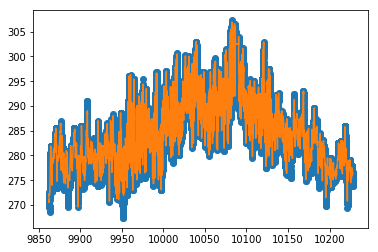

In [13]:
# Interpolation of temperature
time_horizon = np.array(horizon_data['dayofyear1993'])
time = np.array(met_data['dayofyear1993'])
Temp = np.array(met_data['temperature'])
f = interpolate.interp1d(time, Temp, kind = 'nearest',axis=- 1, copy=True, bounds_error=None, fill_value=nan, assume_sorted=False)
Temp_new = f(time_horizon)
plt.plot(time, Temp, 'o', time_horizon, Temp_new, '-')
plt.show()

## 1.2 Temperature correction

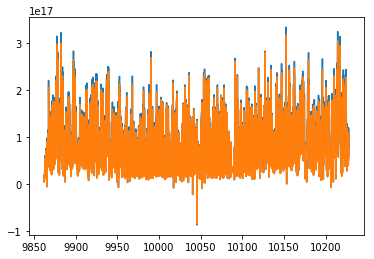

[270.6 270.6 270.6 ... 276.4 276.4 276.4]


In [14]:
# correction of temperature
T_ref =298
#print(T_ref)
SC_ref=horizon_data['NO2']
T_actual = Temp_new
SC_corr = SC_ref*(1.0+(T_actual-T_ref)*0.00357) 
#print(len(SC_corr))
plt.plot(time_horizon, SC_ref, '-', time_horizon, SC_corr)
plt.show()
print(T_actual)

In [15]:
horizon_data['corrected_SC']= SC_corr
horizon_data

dayofyear1993       time  solar-azimuth-angle  viewing-azimuth-angle  \
0         9862.348520   8.364470               138.00                  130.0   
1         9862.348923   8.374150               138.12                  140.0   
2         9862.349326   8.383833               138.24                  150.0   
3         9862.349730   8.393519               138.36                  160.0   
4         9862.350133   8.403200               138.48                  170.0   
5         9862.350547   8.413137               138.61                  180.0   
6         9862.350951   8.422819               138.73                  190.0   
7         9862.351354   8.432500               138.85                  200.0   
8         9862.351758   8.442184               138.97                  210.0   
9         9862.352161   8.451867               139.09                  220.0   
10        9862.352564   8.461547               139.21                  230.0   
11        9862.352968   8.471230               139.33                  240.0   
12        9862.353371   8.480911               139.45                  250.0   
13        9862.353786   8.490852               139.58                  260.0   
14        9862.354189   8.500533               139.70                  270.0   
15        9862.354592   8.510214               139.82                  280.0   
16        9862.354995   8.519883               139.94                  290.0   
17        9862.355398   8.529564               140.06                  300.0   
18        9862.355802   8.539250               140.19                  310.0   
19        9862.356206   8.548933               140.31                  320.0   
20        9862.356609   8.558617               140.43                  330.0   
21        9862.357034   8.568806               140.56                  340.0   
22        9862.357458   8.578995               140.69                  350.0   
23        9862.357862   8.588677               140.81                  360.0   
24        9862.382890   9.189353               148.54                  130.0   
25        9862.383293   9.199036               148.67                  140.0   
26        9862.383697   9.208719               148.79                  150.0   
27        9862.384100   9.218394               148.92                  160.0   
28        9862.384503   9.228072               149.05                  170.0   
29        9862.384917   9.238000               149.18                  180.0   
...               ...        ...                  ...                    ...   
123564   10227.595303  14.287275               218.51                  310.0   
123565   10227.595714  14.297128               218.63                  320.0   
123566   10227.596124  14.306983               218.76                  330.0   
123567   10227.596524  14.316569               218.88                  340.0   
123568   10227.596934  14.326423               219.00                  350.0   
123569   10227.597345  14.336281               219.13                  360.0   
123570   10227.622152  14.931650               226.51                  130.0   
123571   10227.622562  14.941500               226.63                  140.0   
123572   10227.622962  14.951086               226.74                  150.0   
123573   10227.623372  14.960931               226.86                  160.0   
123574   10227.623782  14.970775               226.98                  170.0   
123575   10227.624193  14.980622               227.10                  180.0   
123576   10227.624592  14.990211               227.22                  190.0   
123577   10227.625003  15.000061               227.34                  200.0   
123578   10227.625413  15.009906               227.46                  210.0   
123579   10227.625811  15.019469               227.57                  220.0   
123580   10227.626220  15.029286               227.69                  230.0   
123581   10227.626629  15.039105               227.81                  240.0   
123582  

## 1.2.1 Annual horizon with and without T- correction

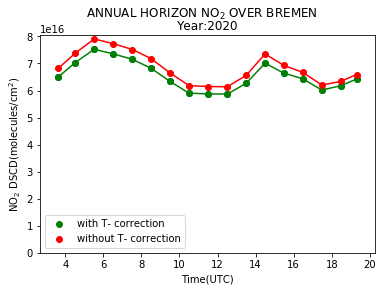

In [16]:
# compute annual mean of NO2 independent of direction as a function of time of day
time_year1=[]
NO2_year1=[]

for j in range(3,20):# (3,20);3 A.M. is the starting time of the day and 19 P.M. is the ending one through ALL months
    time_year1.append(horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1)), 'time'].mean()) 
    NO2_year1.append(horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1)), 'corrected_SC'].mean())            
            
plt.scatter(time_year1,NO2_year1)

# compute annual mean of NO2 independent of direction as a function of time of day
time_year=[]
NO2_year=[]

for j in range(3,20):# (3,20);3 A.M. is the starting time of the day and 19 P.M. is the ending one through ALL months
    time_year.append(horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1)), 'time'].mean()) 
    NO2_year.append(horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1)), 'NO2'].mean())            
plt.scatter(time_year1,NO2_year1,label = 'with T- correction',color ='green' )            
plt.scatter(time_year,NO2_year,label = 'without T- correction',color = 'red')
plt.plot(time_year1,NO2_year1,color ='green' )            
plt.plot(time_year,NO2_year,color = 'red')
plt.ylim(bottom=0)
#plt.ylim(top=9*1e16)
plt.suptitle('ANNUAL HORIZON NO$_2$ OVER BREMEN')
plt.legend(loc='lower left')
plt.title('Year:2020') 
plt.xlabel('Time(UTC)') 
plt.ylabel('NO$_2$ DSCD(molecules/cm$^2$)')
plt.show()


## 1.2.2 Seasonal NO2 with and without T-correction

[8.599845052349606e+16, 8.35537203954497e+16, 8.440855805137171e+16, 8.883261222051954e+16, 9.08608987218666e+16, 1.0187178060708446e+17, 1.1925517431226592e+17]
[6.399791604443066e+16, 6.950152920757888e+16, 7.395501852050203e+16, 7.172949415808723e+16, 6.398374781611131e+16, 5.380009093387478e+16, 5.033110259004705e+16, 4.2877236319008856e+16, 3.964607983337679e+16, 3.5777869895215492e+16, 3.4775979718791092e+16, 3.769982139984744e+16, 3.841161900434019e+16, 4.1843910793467144e+16, 4.846845573043936e+16, 5.752933196427611e+16, 6.673559860475762e+16]
[8.599845052349606e+16, 8.35537203954497e+16, 8.440855805137171e+16, 8.883261222051954e+16, 9.08608987218666e+16, 1.0187178060708446e+17, 1.1925517431226592e+17]
[6.399791604443066e+16, 6.950152920757888e+16, 7.395501852050203e+16, 7.172949415808723e+16, 6.398374781611131e+16, 5.380009093387478e+16, 5.033110259004705e+16, 4.2877236319008856e+16, 3.964607983337679e+16, 3.5777869895215492e+16, 3.4775979718791092e+16, 3.769982139984744e+16, 

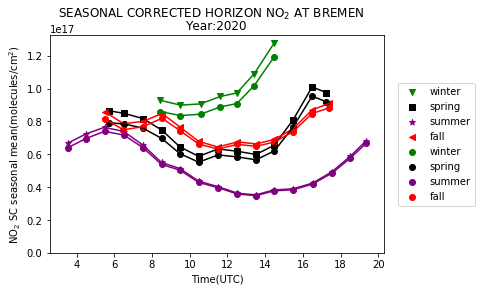

In [46]:
time_DJF1=[] # letters DJF are dec, jan and feb respectively and so for others.
NO2_DJF1=[]
count1=[]
time_MAM1=[]
NO2_MAM1=[]
time_JJA1=[]
NO2_JJA1=[]
time_SON1=[]
NO2_SON1=[]
MIN_COUNT=200


count=[]
month=12 or 1 or 2
for j in range(3,20):# (3,20);3 A.M. is the starting time of the day and 19 P.M. is the ending one through ALL months. Python takes 3 as it is but for second no. it takes 1 less.
    if (horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month), 'NO2'].count()) > MIN_COUNT:
        time_DJF1.append(horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month), 'time'].mean()) 
        NO2_DJF1.append(horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month), 'NO2'].mean())
    count.append(horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month), 'NO2'].count())
    
#print(count)
print(NO2_DJF)

count=[]
month=3 or 4 or 5 
for j in range(3,20):
    if (horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month), 'NO2'].count()) > MIN_COUNT:
        time_MAM1.append(horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month), 'time'].mean()) 
        NO2_MAM1.append(horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month), 'NO2'].mean())
    count.append(horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month), 'NO2'].count())

#print(count)   
#print(NO2_MAM)    

count=[]
month=6 or 7 or 8 
for j in range(3,20):
    if (horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month), 'NO2'].count()) > MIN_COUNT:
        time_JJA1.append(horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month), 'time'].mean()) 
        NO2_JJA1.append(horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month), 'NO2'].mean())
    count.append(horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month), 'NO2'].count())

#print(count)   
print(NO2_JJA)

count=[]
month=9 or 10 or 11 
for j in range(3,20):
    if (horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month), 'NO2'].count()) > MIN_COUNT:
        time_SON1.append(horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month), 'time'].mean()) 
        NO2_SON1.append(horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month), 'NO2'].mean())
    count.append(horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month), 'NO2'].count())

#print(count)   
#print(NO2_SON)    
    







time_DJF=[] # letters DJF are dec, jan and feb respectively and so for others.
NO2_DJF=[]
count=[]
time_MAM=[]
NO2_MAM=[]
time_JJA=[]
NO2_JJA=[]
time_SON=[]
NO2_SON=[]
MIN_COUNT=200


count=[]
month=12 or 1 or 2
for j in range(3,20):# (3,20);3 A.M. is the starting time of the day and 19 P.M. is the ending one through ALL months. Python takes 3 as it is but for second no. it takes 1 less.
    if (horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month), 'corrected_SC'].count()) > MIN_COUNT:
        time_DJF.append(horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month), 'time'].mean()) 
        NO2_DJF.append(horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month), 'corrected_SC'].mean())
    count.append(horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month), 'corrected_SC'].count())
    
#print(count)   
print(NO2_DJF)
count=[]
month=3 or 4 or 5 
for j in range(3,20):
    if (horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month), 'corrected_SC'].count()) > MIN_COUNT:
        time_MAM.append(horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month), 'time'].mean()) 
        NO2_MAM.append(horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month), 'corrected_SC'].mean())
    count.append(horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month), 'corrected_SC'].count())

#print(count)   
#print(NO2_MAM)   

count=[]
month=6 or 7 or 8 
for j in range(3,20):
    if (horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month), 'corrected_SC'].count()) > MIN_COUNT:
        time_JJA.append(horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month), 'time'].mean()) 
        NO2_JJA.append(horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month), 'corrected_SC'].mean())
    count.append(horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month), 'corrected_SC'].count())

#print(count)   
print(NO2_JJA)

count=[]
month=9 or 10 or 11 
for j in range(3,20):
    if (horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month), 'corrected_SC'].count()) > MIN_COUNT:
        time_SON.append(horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month), 'time'].mean()) 
        NO2_SON.append(horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month), 'corrected_SC'].mean())
    count.append(horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month), 'corrected_SC'].count())

#print(count)   
#print(NO2_SON)
plt.scatter(time_DJF1,NO2_DJF1, label = 'winter',color = 'green', marker ='v')
plt.plot(time_DJF1,NO2_DJF1,color = 'green')
plt.scatter(time_MAM1,NO2_MAM1, label = 'spring',color = 'black',marker ='s')
plt.scatter(time_JJA1,NO2_JJA1, label ='summer', color = 'purple',marker ='*')
plt.scatter(time_SON1,NO2_SON1, label = 'fall', color = 'red',marker ='<')
plt.plot(time_MAM1,NO2_MAM1, color = 'black')
plt.plot(time_JJA1,NO2_JJA1,  color = 'purple')
plt.plot(time_SON1,NO2_SON1, color = 'red')

    
plt.scatter(time_DJF,NO2_DJF, label = 'winter',color = 'green')
plt.plot(time_DJF,NO2_DJF,color = 'green')
plt.scatter(time_MAM,NO2_MAM, label = 'spring',color = 'black')
plt.scatter(time_JJA,NO2_JJA, label ='summer', color = 'purple')
plt.scatter(time_SON,NO2_SON, label = 'fall', color = 'red')
plt.plot(time_MAM,NO2_MAM, color = 'black')
plt.plot(time_JJA,NO2_JJA,  color = 'purple')
plt.plot(time_SON,NO2_SON, color = 'red')
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
plt.ylim(bottom=0)
plt.suptitle('SEASONAL CORRECTED HORIZON NO$_2$ AT BREMEN')
plt.title('Year:2020')
plt.xlabel('Time(UTC)') 
plt.ylabel('NO$_2$ SC seasonal mean(molecules/cm$^2$)')
plt.show()

[9.285638503341294e+16, 8.992921367796597e+16, 9.066077049881234e+16, 9.519659744680856e+16, 9.73336553460619e+16, 1.0910932616306931e+17, 1.2768979704108203e+17]
[6.6745647078947384e+16, 7.229529027745654e+16, 7.645717677085797e+16, 7.380956710382507e+16, 6.556920600472814e+16, 5.499470004860267e+16, 5.132642016548465e+16, 4.3596231498301256e+16, 4.0280161315158104e+16, 3.62815684562996e+16, 3.5272346868944136e+16, 3.82957910475624e+16, 3.897019734007797e+16, 4.245491457142857e+16, 4.93085045465253e+16, 5.868658339552236e+16, 6.8203810210526296e+16]


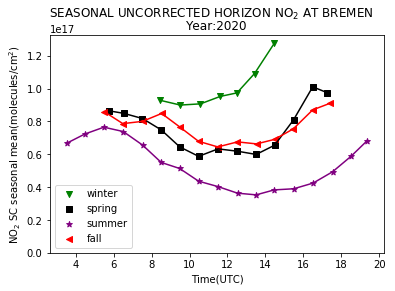

[8.599845052349606e+16, 8.35537203954497e+16, 8.440855805137171e+16, 8.883261222051954e+16, 9.08608987218666e+16, 1.0187178060708446e+17, 1.1925517431226592e+17]
[6.399791604443066e+16, 6.950152920757888e+16, 7.395501852050203e+16, 7.172949415808723e+16, 6.398374781611131e+16, 5.380009093387478e+16, 5.033110259004705e+16, 4.2877236319008856e+16, 3.964607983337679e+16, 3.5777869895215492e+16, 3.4775979718791092e+16, 3.769982139984744e+16, 3.841161900434019e+16, 4.1843910793467144e+16, 4.846845573043936e+16, 5.752933196427611e+16, 6.673559860475762e+16]


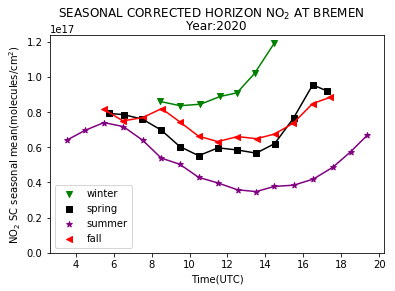

In [39]:
time_DJF=[] # letters DJF are dec, jan and feb respectively and so for others.
NO2_DJF=[]
count=[]
time_MAM=[]
NO2_MAM=[]
time_JJA=[]
NO2_JJA=[]
time_SON=[]
NO2_SON=[]
MIN_COUNT=200


count=[]
month=12 or 1 or 2
for j in range(3,20):# (3,20);3 A.M. is the starting time of the day and 19 P.M. is the ending one through ALL months. Python takes 3 as it is but for second no. it takes 1 less.
    if (horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month), 'NO2'].count()) > MIN_COUNT:
        time_DJF.append(horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month), 'time'].mean()) 
        NO2_DJF.append(horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month), 'NO2'].mean())
    count.append(horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month), 'NO2'].count())
    
#print(count)
print(NO2_DJF)

count=[]
month=3 or 4 or 5 
for j in range(3,20):
    if (horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month), 'NO2'].count()) > MIN_COUNT:
        time_MAM.append(horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month), 'time'].mean()) 
        NO2_MAM.append(horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month), 'NO2'].mean())
    count.append(horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month), 'NO2'].count())

#print(count)   
#print(NO2_MAM)    

count=[]
month=6 or 7 or 8 
for j in range(3,20):
    if (horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month), 'NO2'].count()) > MIN_COUNT:
        time_JJA.append(horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month), 'time'].mean()) 
        NO2_JJA.append(horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month), 'NO2'].mean())
    count.append(horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month), 'NO2'].count())

#print(count)   
print(NO2_JJA)

count=[]
month=9 or 10 or 11 
for j in range(3,20):
    if (horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month), 'NO2'].count()) > MIN_COUNT:
        time_SON.append(horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month), 'time'].mean()) 
        NO2_SON.append(horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month), 'NO2'].mean())
    count.append(horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month), 'NO2'].count())

#print(count)   
#print(NO2_SON)    
    
plt.scatter(time_DJF,NO2_DJF, label = 'winter',color = 'green', marker ='v')
plt.plot(time_DJF,NO2_DJF,color = 'green')
plt.scatter(time_MAM,NO2_MAM, label = 'spring',color = 'black',marker ='s')
plt.scatter(time_JJA,NO2_JJA, label ='summer', color = 'purple',marker ='*')
plt.scatter(time_SON,NO2_SON, label = 'fall', color = 'red',marker ='<')
plt.plot(time_MAM,NO2_MAM, color = 'black')
plt.plot(time_JJA,NO2_JJA,  color = 'purple')
plt.plot(time_SON,NO2_SON, color = 'red')
plt.legend(loc ='lower left')
plt.ylim(bottom=0)
plt.suptitle('SEASONAL UNCORRECTED HORIZON NO$_2$ AT BREMEN')
plt.title('Year:2020')
plt.xlabel('Time(UTC)') 
plt.ylabel('NO$_2$ SC seasonal mean(molecules/cm$^2$)')
plt.show()






time_DJF=[] # letters DJF are dec, jan and feb respectively and so for others.
NO2_DJF=[]
count=[]
time_MAM=[]
NO2_MAM=[]
time_JJA=[]
NO2_JJA=[]
time_SON=[]
NO2_SON=[]
MIN_COUNT=200


count=[]
month=12 or 1 or 2
for j in range(3,20):# (3,20);3 A.M. is the starting time of the day and 19 P.M. is the ending one through ALL months. Python takes 3 as it is but for second no. it takes 1 less.
    if (horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month), 'corrected_SC'].count()) > MIN_COUNT:
        time_DJF.append(horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month), 'time'].mean()) 
        NO2_DJF.append(horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month), 'corrected_SC'].mean())
    count.append(horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month), 'corrected_SC'].count())
    
#print(count)   
print(NO2_DJF)
count=[]
month=3 or 4 or 5 
for j in range(3,20):
    if (horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month), 'corrected_SC'].count()) > MIN_COUNT:
        time_MAM.append(horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month), 'time'].mean()) 
        NO2_MAM.append(horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month), 'corrected_SC'].mean())
    count.append(horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month), 'corrected_SC'].count())

#print(count)   
#print(NO2_MAM)   

count=[]
month=6 or 7 or 8 
for j in range(3,20):
    if (horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month), 'corrected_SC'].count()) > MIN_COUNT:
        time_JJA.append(horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month), 'time'].mean()) 
        NO2_JJA.append(horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month), 'corrected_SC'].mean())
    count.append(horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month), 'corrected_SC'].count())

#print(count)   
print(NO2_JJA)

count=[]
month=9 or 10 or 11 
for j in range(3,20):
    if (horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month), 'corrected_SC'].count()) > MIN_COUNT:
        time_SON.append(horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month), 'time'].mean()) 
        NO2_SON.append(horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month), 'corrected_SC'].mean())
    count.append(horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month), 'corrected_SC'].count())

#print(count)   
#print(NO2_SON)    
    
plt.scatter(time_DJF,NO2_DJF, label = 'winter',color = 'green', marker ='v')
plt.plot(time_DJF,NO2_DJF,color = 'green')
plt.scatter(time_MAM,NO2_MAM, label = 'spring',color = 'black',marker ='s')
plt.scatter(time_JJA,NO2_JJA, label ='summer', color = 'purple',marker ='*')
plt.scatter(time_SON,NO2_SON, label = 'fall', color = 'red',marker ='<')
plt.plot(time_MAM,NO2_MAM, color = 'black')
plt.plot(time_JJA,NO2_JJA,  color = 'purple')
plt.plot(time_SON,NO2_SON, color = 'red')
plt.legend(loc = 'lower left')
plt.ylim(bottom=0)
plt.suptitle('SEASONAL CORRECTED HORIZON NO$_2$ AT BREMEN')
plt.title('Year:2020')
plt.xlabel('Time(UTC)') 
plt.ylabel('NO$_2$ SC seasonal mean(molecules/cm$^2$)')
plt.show()

## 1.3 Interpolation of wind speed

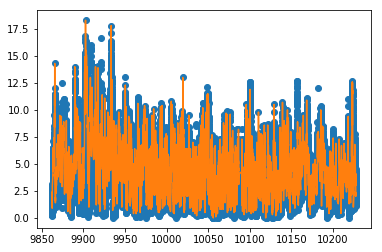

In [18]:
time_horizon = np.array(horizon_data['dayofyear1993'])
time = np.array(met_data['dayofyear1993'])
WS = np.array(met_data['wind_speed'])
f = interpolate.interp1d(time, WS, kind = 'nearest',axis=- 1, copy=True, bounds_error=None, fill_value=nan, assume_sorted=False)
WS_new = f(time_horizon)
plt.plot(time, WS, 'o', time_horizon, WS_new, '-')
plt.show()

In [19]:
len(WS_new)

123594

## 1.4 Interpolation of wind direction

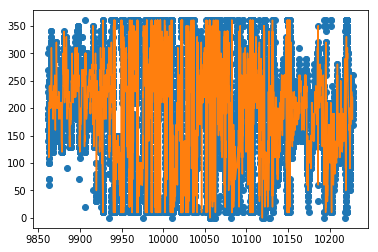

In [20]:
time_horizon = np.array(horizon_data['dayofyear1993'])
time = np.array(met_data['dayofyear1993'])
WD = np.array(met_data['wind_direction'])
f = interpolate.interp1d(time, WD, kind = 'nearest',axis=- 1, copy=True, bounds_error=None, fill_value=nan, assume_sorted=False)
WD_new = f(time_horizon)
plt.plot(time, WD, 'o', time_horizon, WD_new, '-')
plt.show()

## 1.4 Interpolation of pressure

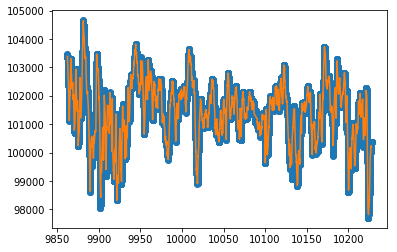

In [21]:
time_horizon = np.array(horizon_data['dayofyear1993'])
time = np.array(met_data['dayofyear1993'])
press = np.array(met_data['pressure'])
f = interpolate.interp1d(time, press, kind = 'nearest',axis=- 1, copy=True, bounds_error=None, fill_value=nan, assume_sorted=False)
press_new = f(time_horizon)
plt.plot(time, press, 'o', time_horizon, press_new, '-')
plt.show()

In [22]:
import math
doy_1993 = horizon_data['dayofyear1993']
day_of_year = datetime.date.fromordinal(math.trunc(doy_1993[0]) + datetime.date.toordinal(datetime.date(1993, 1, 1)) - 1)
print(day_of_year)

2020-01-01


0        2020-01-01 08:21:52.128000000
1        2020-01-01 08:22:26.947200000
2        2020-01-01 08:23:01.766400000
3        2020-01-01 08:23:36.672000000
4        2020-01-01 08:24:11.491200000
5        2020-01-01 08:24:47.260800000
6        2020-01-01 08:25:22.166400000
7        2020-01-01 08:25:56.985600000
8        2020-01-01 08:26:31.891200000
9        2020-01-01 08:27:06.710400000
10       2020-01-01 08:27:41.529600000
11       2020-01-01 08:28:16.435200000
12       2020-01-01 08:28:51.254400000
13       2020-01-01 08:29:27.110400000
14       2020-01-01 08:30:01.929599999
15       2020-01-01 08:30:36.748800000
16       2020-01-01 08:31:11.568000000
17       2020-01-01 08:31:46.387200000
18       2020-01-01 08:32:21.292800000
19       2020-01-01 08:32:56.198400000
20       2020-01-01 08:33:31.017600000
21       2020-01-01 08:34:07.737600000
22       2020-01-01 08:34:44.371200000
23       2020-01-01 08:35:19.276800000
24       2020-01-01 09:11:21.696000000
25       2020-01-01 09:11

Text(0, 0.5, 'SC CORRECTION FACTOR')

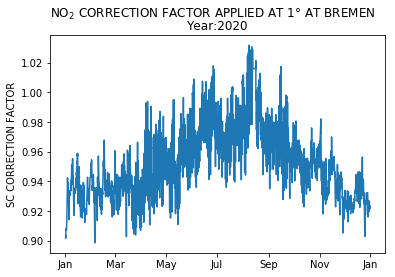

In [23]:
from matplotlib import dates as mpl_dates
doy_1993 = horizon_data['dayofyear1993']
DOY = pd.to_datetime('1993-1-1') + pd.to_timedelta(doy_1993, unit='D')- pd.Timedelta(days=1)
print(DOY)
SC_factor =(1.0+(T_actual-T_ref)*0.00357)
plt.plot(DOY,SC_factor)
date_format =mpl_dates.DateFormatter('%b')
plt.gca().xaxis.set_major_formatter(date_format)
plt.suptitle('NO$_2$ CORRECTION FACTOR APPLIED AT 1° AT BREMEN')
plt.title('Year:2020')
#plt.xlabel('MONTHS')
plt.ylabel('SC CORRECTION FACTOR')

## 1.5 Directional correction of NO2 column

In [24]:
print(len(horizon_data)-1)

123593


In [25]:
# Add new columns to panda data frame
horizon_data.assign(azimuth_correction=horizon_data['H2O'])
horizon_data.assign(azimuth_correction_O4=horizon_data['O4'])
horizon_data.assign(NO2_corrected=SC_corr)
horizon_data.assign(NO2_corrected_O4=SC_corr)
horizon_data.assign(NO2_VMR=SC_corr)
horizon_data.assign(L=SC_corr)

K_boltz = 1.38*1e-23 # Boltzmann constant. Unit:[JK^-1]

RAA_value=[]  # relative azimuths for current azimuthal scan
scan_start=0  # starting_position for current azimuthal scan in horizon_data

# loop over all measurements of the year
for i in range (0,len(horizon_data)-1):
  # check if start of next azimuth scan is detected
  if horizon_data.at[i,'viewing-azimuth-angle'] == 130:
    # check if there are measurements in current azimuthal scan 
    if RAA_value != []:
        # find position of relative azimuth closest to 90° in current azimuthal scan
        scan_90 = min(range(len(RAA_value)), key=lambda j: abs(abs(RAA_value[j])-90))
        # store H2O and O4 value at 90° RAA
        ref_h2o = horizon_data.at[scan_start+scan_90,'H2O']
        ref_o4 = horizon_data.at[scan_start+scan_90,'O4']
        # normalise H2O and O4 values in current scan
        for k in range (scan_start, i):
            horizon_data.at[k,'azimuth_correction'] = horizon_data.at[k,'H2O'] / ref_h2o
            horizon_data.at[k,'azimuth_correction_O4'] = horizon_data.at[k,'O4'] / ref_o4
        # correct NO2 values with normalised H2O and O4 values
        for k in range (scan_start, i):
            horizon_data.at[k,'NO2_corrected'] = horizon_data.at[k,'NO2'] / horizon_data.at[k,'azimuth_correction']
            horizon_data.at[k,'NO2_corrected_O4'] = horizon_data.at[k,'NO2'] / horizon_data.at[k,'azimuth_correction_O4']
            horizon_data.at[k,'O4_corrected'] = horizon_data.at[k,'O4'] / horizon_data.at[k,'azimuth_correction']
        # Compute light path length L from O4 and compute NO2_VMR
        for k in range (scan_start, i):
            # number density of air: N/V=P/KT. Unit:[molecules/m^3]
            n_air = press_new[k] / (Temp_new[k] * K_boltz)
            #Number density of O4: n_O4 =[(0.20942 * n_air)**2]*K_O4   # 0.20942 is the mixing ratio of oxygen and K_O4 is equilibrium constant of O4. Unit:[1/(moleculesm^-3)]
            n_O2 =(0.20942 * n_air)
            # horizontal light path length = DSCD_O4/n_O4 = DSCD_O4/(n_O2)^2
            horizon_data.at[k,'L'] = horizon_data.at[scan_start+scan_90,'O4'] * 1e50 / (n_O2)**2 # Unit = [m] and DSCD_O4 = SCD_O4_horizon - SCD_O4_zenith
            # divide corrected NO2 values with light path length L and air density and convert to ppb
            horizon_data.at[k,'NO2_VMR'] = horizon_data.at[k,'NO2_corrected'] * 1e4 / (horizon_data.at[k,'L'] * n_air) * 1e9
    #horizon_data['L'].max()
    # clear list of current azimuthal scan 
    RAA_value=[]
    # update position of scan_start
    scan_start=i
  # add current value to current azimuthal scan
  RAA_value.append(horizon_data.at[i,'relative-azimuth-angle'])
#print(RAA_value)
    
#horizon_data.to_csv(r"P:\test_2.csv")
print(horizon_data)
#horizon_data['L'].max()

        dayofyear1993       time  solar-azimuth-angle  viewing-azimuth-angle  \
0         9862.348520   8.364470               138.00                  130.0   
1         9862.348923   8.374150               138.12                  140.0   
2         9862.349326   8.383833               138.24                  150.0   
3         9862.349730   8.393519               138.36                  160.0   
4         9862.350133   8.403200               138.48                  170.0   
5         9862.350547   8.413137               138.61                  180.0   
6         9862.350951   8.422819               138.73                  190.0   
7         9862.351354   8.432500               138.85                  200.0   
8         9862.351758   8.442184               138.97                  210.0   
9         9862.352161   8.451867               139.09                  220.0   
10        9862.352564   8.461547               139.21                  230.0   
11        9862.352968   8.471230        

In [ ]:
RAA = horizon_data['relative-azimuth-angle']
time_weekend=[]
NO2_weekend=[]
time_week=[]
NO2_week=[]
day_name='Saturday'or 'Sunday'
for j in range(3,20):
    time_weekend.append(horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&((horizon_data['day-of-week-no']==0)|(horizon_data['day-of-week-no']==6)), 'time'].mean()) 
    NO2_weekend.append(horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&((horizon_data['day-of-week-no']==0)|(horizon_data['day-of-week-no']==6)), 'NO2_corrected'].mean())


day_name=('Monday'or 'Tuesday'or'Wednesday'or'Thursday'or'Friday')
for j in range(3,20):
    time_week.append(horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&((horizon_data['day-of-week-no']>0)&(horizon_data['day-of-week-no']<6)), 'time'].mean()) 
    NO2_week.append(horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&((horizon_data['day-of-week-no']>0)&(horizon_data['day-of-week-no']<6)), 'NO2_corrected'].mean())

plt.scatter(time_weekend,NO2_weekend,label= 'weekends')
plt.scatter(time_week,NO2_week,label= 'weekdays')
plt.plot(time_weekend,NO2_weekend)
plt.plot(time_week,NO2_week)
plt.legend()
plt.legend(loc = 'lower left')
plt.ylim(bottom=0)
plt.ylim(top=9*1e16)
plt.suptitle('ANNUAL HORIZON NO$_2$ CORRECTED OVER BREMEN')
plt.title('Year:2020')
plt.xlabel('Time(UTC)') 
plt.ylabel('NO$_2$ SC hourly mean(molecules/cm$^2$)')
plt.show()

In [ ]:
time_weekend=[]
O4_weekend=[]
time_week=[]
O4_week=[]
day_name='Saturday'or 'Sunday'
for j in range(3,20):
    time_weekend.append(horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&((horizon_data['day-of-week-no']==0)|(horizon_data['day-of-week-no']==6)), 'time'].mean()) 
    O4_weekend.append(horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&((horizon_data['day-of-week-no']==0)|(horizon_data['day-of-week-no']==6)), 'O4_corrected'].mean())
    o4_weekend = [data*1e40 for data in O4_weekend ]

day_name=('Monday'or 'Tuesday'or'Wednesday'or'Thursday'or'Friday')
for j in range(3,20):
    time_week.append(horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&((horizon_data['day-of-week-no']>0)&(horizon_data['day-of-week-no']<6)), 'time'].mean()) 
    O4_week.append(horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&((horizon_data['day-of-week-no']>0)&(horizon_data['day-of-week-no']<6)), 'O4_corrected'].mean())
    o4_week = [data*1e40 for data in O4_week ]
plt.scatter(time_weekend,o4_weekend,label= 'weekends')
plt.scatter(time_week,o4_week,label= 'weekdays')
plt.plot(time_weekend,o4_weekend)
plt.plot(time_week,o4_week)
plt.legend()
plt.legend(loc = 'lower left')
plt.ylim(bottom=0)
#plt.ylim(top=9*1e16)
plt.suptitle('ANNUAL HORIZON O$_4$ CORRECTED OVER BREMEN')
plt.title('Year:2020')
plt.xlabel('Time(UTC)') 
plt.ylabel('NO$_2$ SC hourly mean(molecules/cm$^5$)')
plt.show()

In [27]:
# # Add new columns to panda data frame
# horizon_data.assign(azimuth_correction=horizon_data['H2O'])
# horizon_data.assign(azimuth_correction_O4=horizon_data['O4'])
# horizon_data.assign(NO2_corrected=horizon_data['NO2'])
# horizon_data.assign(NO2_corrected_O4=horizon_data['NO2'])
# horizon_data.assign(NO2_VMR=horizon_data['NO2'])
# horizon_data.assign(L=horizon_data['NO2'])

# K_boltz = 1.38*1e-23 # Boltzmann constant. Unit:[JK^-1]

# RAA_value=[]  # relative azimuths for current azimuthal scan
# scan_start=0  # starting_position for current azimuthal scan in horizon_data

# # loop over all measurements of the year
# for i in range (0,len(horizon_data)-1):
#   # check if start of next azimuth scan is detected
#   if horizon_data.at[i,'viewing-azimuth-angle'] == 130:
#     # check if there are measurements in current azimuthal scan 
#     if RAA_value != []:
#         # find position of relative azimuth closest to 90° in current azimuthal scan
#         scan_90 = min(range(len(RAA_value)), key=lambda j: abs(abs(RAA_value[j])-90))
#         # store H2O and O4 value at 90° RAA
#         ref_h2o = horizon_data.at[scan_start+scan_90,'H2O']
#         ref_o4 = horizon_data.at[scan_start+scan_90,'O4']
#         # normalise H2O and O4 values in current scan
#         for k in range (scan_start, i):
#             horizon_data.at[k,'azimuth_correction'] = horizon_data.at[k,'H2O'] / ref_h2o
#             horizon_data.at[k,'azimuth_correction_O4'] = horizon_data.at[k,'O4'] / ref_o4
#         # correct NO2 values with normalised H2O and O4 values
#         for k in range (scan_start, i):
#             horizon_data.at[k,'NO2_corrected'] = horizon_data.at[k,'NO2'] / horizon_data.at[k,'azimuth_correction']
#             horizon_data.at[k,'NO2_corrected_O4'] = horizon_data.at[k,'NO2'] / horizon_data.at[k,'azimuth_correction_O4']
#             horizon_data.at[k,'O4_corrected'] = horizon_data.at[k,'O4'] / horizon_data.at[k,'azimuth_correction']
#         # Compute light path length L from O4 and compute NO2_VMR
#         for k in range (scan_start, i):
#             # number density of air: N/V=P/KT. Unit:[molecules/m^3]
#             n_air = press_new[k] / (Temp_new[k] * K_boltz)
#             #Number density of O4: n_O4 =[(0.20942 * n_air)**2]*K_O4   # 0.20942 is the mixing ratio of oxygen and K_O4 is equilibrium constant of O4. Unit:[1/(moleculesm^-3)]
#             n_O2 =(0.20942 * n_air)
#             # horizontal light path length = DSCD_O4/n_O4 = DSCD_O4/(n_O2)^2
#             horizon_data.at[k,'L'] = horizon_data.at[scan_start+scan_90,'O4'] * 1e50 / (n_O2)**2 # Unit = [m] and DSCD_O4 = SCD_O4_horizon - SCD_O4_zenith
#             # divide corrected NO2 values with light path length L and air density and convert to ppb
#             horizon_data.at[k,'NO2_VMR'] = horizon_data.at[k,'NO2_corrected'] * 1e4 / (horizon_data.at[k,'L'] * n_air) * 1e9
#     #horizon_data['L'].max()
#     # clear list of current azimuthal scan 
#     RAA_value=[]
#     # update position of scan_start
#     scan_start=i
#   # add current value to current azimuthal scan
#   RAA_value.append(horizon_data.at[i,'relative-azimuth-angle'])
# #print(RAA_value)
    
# #horizon_data.to_csv(r"P:\test_2.csv")
# #print(horizon_data)
# #horizon_data['L'].max()

In [28]:
#horizon_data

In [29]:
horizon_data['L'].min()

-6559.96536288647

## A. Averaged diurnal cycle of path averaged NO2 VMR

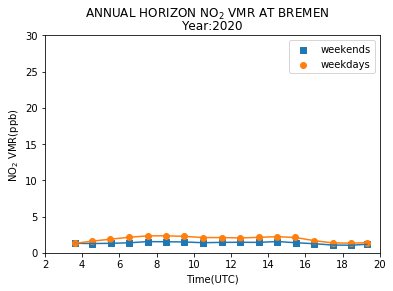

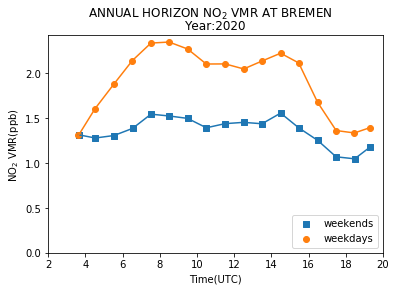

In [30]:
time_weekend=[]
NO2_weekend=[]
time_week=[]
NO2_week=[]
day_name='Saturday'or 'Sunday'
for j in range(3,20):
    time_weekend.append(horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&((horizon_data['day-of-week-no']==0)|(horizon_data['day-of-week-no']==6))&(horizon_data['L']>5000), 'time'].mean()) 
    NO2_weekend.append(horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&((horizon_data['day-of-week-no']==0)|(horizon_data['day-of-week-no']==6))&(horizon_data['L']>5000), 'NO2_VMR'].mean())


day_name=('Monday'or 'Tuesday'or'Wednesday'or'Thursday'or'Friday')
for j in range(3,20):
    time_week.append(horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&((horizon_data['day-of-week-no']>0)&(horizon_data['day-of-week-no']<6))&(horizon_data['L']>5000), 'time'].mean()) 
    NO2_week.append(horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&((horizon_data['day-of-week-no']>0)&(horizon_data['day-of-week-no']<6))&(horizon_data['L']>5000), 'NO2_VMR'].mean())

#print(horizon_data['X_NO2'])

plt.scatter(time_weekend,NO2_weekend,label= 'weekends', marker = 's')
plt.scatter(time_week,NO2_week,label= 'weekdays')
plt.plot(time_weekend,NO2_weekend)
plt.plot(time_week,NO2_week)
plt.legend()
plt.legend(loc = 'upper right')
plt.ylim(bottom=0)
plt.xlim(2,20)
plt.ylim(0,30)
#plt.ylim(top=9*1e13)
plt.suptitle('ANNUAL HORIZON NO$_2$ VMR AT BREMEN')
plt.title('Year:2020')
plt.xlabel('Time(UTC)') 
plt.ylabel('NO$_2$ VMR(ppb)')
plt.show()


time_weekend=[]
NO2_weekend=[]
time_week=[]
NO2_week=[]
day_name='Saturday'or 'Sunday'
for j in range(3,20):
    time_weekend.append(horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&((horizon_data['day-of-week-no']==0)|(horizon_data['day-of-week-no']==6))&(horizon_data['L']>5000), 'time'].mean()) 
    NO2_weekend.append(horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&((horizon_data['day-of-week-no']==0)|(horizon_data['day-of-week-no']==6))&(horizon_data['L']>5000), 'NO2_VMR'].mean())


day_name=('Monday'or 'Tuesday'or'Wednesday'or'Thursday'or'Friday')
for j in range(3,20):
    time_week.append(horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&((horizon_data['day-of-week-no']>0)&(horizon_data['day-of-week-no']<6))&(horizon_data['L']>5000), 'time'].mean()) 
    NO2_week.append(horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&((horizon_data['day-of-week-no']>0)&(horizon_data['day-of-week-no']<6))&(horizon_data['L']>5000), 'NO2_VMR'].mean())

#print(horizon_data['X_NO2'])

plt.scatter(time_weekend,NO2_weekend,label= 'weekends', marker = 's')
plt.scatter(time_week,NO2_week,label= 'weekdays')
plt.plot(time_weekend,NO2_weekend)
plt.plot(time_week,NO2_week)
plt.legend()
plt.legend(loc = 'lower right')
plt.ylim(bottom=0)
plt.xlim(2,20)
#plt.ylim(0,25)
#plt.ylim(top=9*1e13)
plt.suptitle('ANNUAL HORIZON NO$_2$ VMR AT BREMEN')
plt.title('Year:2020')
plt.xlabel('Time(UTC)') 
plt.ylabel('NO$_2$ VMR(ppb)')
plt.show()



## B. Azimuthal dependence of path-averaged NO2 VMR

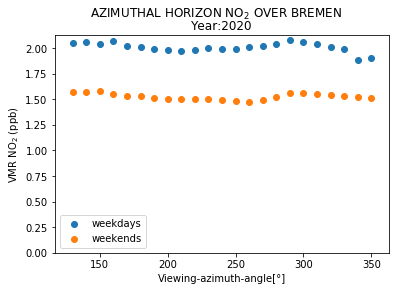

In [31]:
vazim_weekend=[]
vNO2_weekend=[]
vazim_week=[]
vNO2_week=[]

day_name='Saturday'or 'Sunday'
for j in range(130, 360):
    vazim_weekend.append(horizon_data.loc[(horizon_data['viewing-azimuth-angle']>=j) & (horizon_data['viewing-azimuth-angle']<(j+1))&(horizon_data['day-of-week']==day_name)&(horizon_data['L']>5000), 'viewing-azimuth-angle'].mean()) 
    vNO2_weekend.append(horizon_data.loc[(horizon_data['viewing-azimuth-angle']>=j) & (horizon_data['viewing-azimuth-angle']<(j+1))&(horizon_data['day-of-week']==day_name)&(horizon_data['L']>5000), 'NO2_VMR'].mean())


day_name=('Monday'or 'Tuesday'or'Wednesday'or'Thursday'or'Friday')
for j in range(130, 360):
    vazim_week.append(horizon_data.loc[(horizon_data['viewing-azimuth-angle']>=j) & (horizon_data['viewing-azimuth-angle']<(j+1))&(horizon_data['day-of-week']==day_name)&(horizon_data['L']>5000), 'viewing-azimuth-angle'].mean()) 
    vNO2_week.append(horizon_data.loc[(horizon_data['viewing-azimuth-angle']>=j) & (horizon_data['viewing-azimuth-angle']<(j+1))&(horizon_data['day-of-week']==day_name)&(horizon_data['L']>5000), 'NO2_VMR'].mean())

plt.scatter(vazim_week,vNO2_week,label= 'weekdays')
plt.scatter(vazim_weekend,vNO2_weekend,label= 'weekends')
plt.legend()
plt.ylim(bottom=0)
#plt.ylim(top=9*1e12)
plt.legend(loc = 'lower left')
plt.suptitle('AZIMUTHAL HORIZON NO$_2$ OVER BREMEN')
plt.title('Year:2020')
plt.xlabel('Viewing-azimuth-angle[°]') 
plt.ylabel('VMR NO$_2$ (ppb)')
plt.show()

## C. Seasonal cycle of path averaged NO2 VMR

[0, 0, 0, 0, 27, 501, 633, 472, 468, 480, 507, 670, 83, 0, 0, 0, 0]
[0, 0, 271, 819, 779, 806, 739, 797, 852, 805, 802, 788, 867, 819, 362, 0, 0]
[736, 817, 779, 843, 748, 681, 777, 808, 834, 796, 706, 740, 809, 803, 788, 730, 595]
[0, 29, 726, 791, 751, 730, 714, 800, 856, 845, 803, 715, 827, 843, 421, 0, 0]


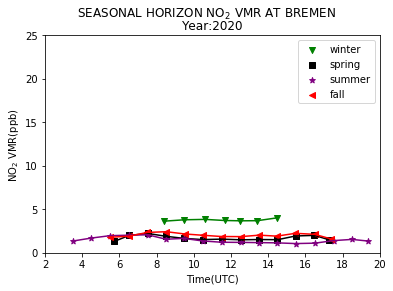

[0, 0, 0, 0, 27, 501, 633, 472, 468, 480, 507, 670, 83, 0, 0, 0, 0]
[0, 0, 271, 819, 779, 806, 739, 797, 852, 805, 802, 788, 867, 819, 362, 0, 0]
[736, 817, 779, 843, 748, 681, 777, 808, 834, 796, 706, 740, 809, 803, 788, 730, 595]
[0, 29, 726, 791, 751, 730, 714, 800, 856, 845, 803, 715, 827, 843, 421, 0, 0]


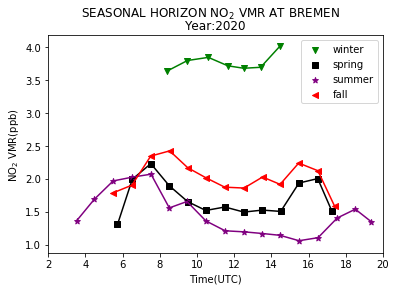

In [32]:
time_DJF=[] # letters DJF are dec, jan and feb respectively and so for others.
NO2_DJF=[]
count=[]
time_MAM=[]
NO2_MAM=[]
time_JJA=[]
NO2_JJA=[]
time_SON=[]
NO2_SON=[]
MIN_COUNT=200


count=[]
month=12 or 1 or 2
for j in range(3,20):# (3,20);3 A.M. is the starting time of the day and 19 P.M. is the ending one through ALL months. Python takes 3 as it is but for second no. it takes 1 less.
    if (horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month)&(horizon_data['L']>5000), 'NO2_VMR'].count()) > MIN_COUNT:
        time_DJF.append(horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month) &(horizon_data['L']>5000), 'time'].mean()) 
        NO2_DJF.append(horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month)&(horizon_data['L']>5000), 'NO2_VMR'].mean())
    count.append(horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month)&(horizon_data['L']>5000), 'NO2_VMR'].count())
    
print(count)   

count=[]
month=3 or 4 or 5 
for j in range(3,20):
    if (horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month)&(horizon_data['L']>5000), 'NO2_VMR'].count()) > MIN_COUNT:
        time_MAM.append(horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month)&(horizon_data['L']>5000), 'time'].mean()) 
        NO2_MAM.append(horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month)&(horizon_data['L']>5000), 'NO2_VMR'].mean())
    count.append(horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month)&(horizon_data['L']>5000), 'NO2_VMR'].count())

print(count)   
    

count=[]
month=6 or 7 or 8 
for j in range(3,20):
    if (horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month)&(horizon_data['L']>5000), 'NO2_VMR'].count()) > MIN_COUNT:
        time_JJA.append(horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month)&(horizon_data['L']>5000), 'time'].mean()) 
        NO2_JJA.append(horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month)&(horizon_data['L']>5000), 'NO2_VMR'].mean())
    count.append(horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month)&(horizon_data['L']>5000), 'NO2_VMR'].count())

print(count)   

count=[]
month=9 or 10 or 11 
for j in range(3,20):
    if (horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month)&(horizon_data['L']>5000), 'NO2_VMR'].count()) > MIN_COUNT:
        time_SON.append(horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month)&(horizon_data['L']>5000), 'time'].mean()) 
        NO2_SON.append(horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month)&(horizon_data['L']>5000), 'NO2_VMR'].mean())
    count.append(horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month)&(horizon_data['L']>5000), 'NO2_VMR'].count())

print(count)   
    
    
plt.scatter(time_DJF,NO2_DJF, label = 'winter',color = 'green', marker ='v')
plt.plot(time_DJF,NO2_DJF,color = 'green')
plt.scatter(time_MAM,NO2_MAM, label = 'spring',color = 'black',marker ='s')
plt.scatter(time_JJA,NO2_JJA, label ='summer', color = 'purple',marker ='*')
plt.scatter(time_SON,NO2_SON, label = 'fall', color = 'red',marker ='<')
plt.plot(time_MAM,NO2_MAM, color = 'black')
plt.plot(time_JJA,NO2_JJA,  color = 'purple')
plt.plot(time_SON,NO2_SON, color = 'red')
plt.legend()
plt.xlim(2,20)
plt.ylim(0,25)
plt.suptitle('SEASONAL HORIZON NO$_2$ VMR AT BREMEN')
plt.title('Year:2020')
plt.xlabel('Time(UTC)') 
plt.ylabel('NO$_2$ VMR(ppb)')
plt.show()



time_DJF=[] # letters DJF are dec, jan and feb respectively and so for others.
NO2_DJF=[]
count=[]
time_MAM=[]
NO2_MAM=[]
time_JJA=[]
NO2_JJA=[]
time_SON=[]
NO2_SON=[]
MIN_COUNT=200


count=[]
month=12 or 1 or 2
for j in range(3,20):# (3,20);3 A.M. is the starting time of the day and 19 P.M. is the ending one through ALL months. Python takes 3 as it is but for second no. it takes 1 less.
    if (horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month)&(horizon_data['L']>5000), 'NO2_VMR'].count()) > MIN_COUNT:
        time_DJF.append(horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month) &(horizon_data['L']>5000), 'time'].mean()) 
        NO2_DJF.append(horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month)&(horizon_data['L']>5000), 'NO2_VMR'].mean())
    count.append(horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month)&(horizon_data['L']>5000), 'NO2_VMR'].count())
    
print(count)   

count=[]
month=3 or 4 or 5 
for j in range(3,20):
    if (horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month)&(horizon_data['L']>5000), 'NO2_VMR'].count()) > MIN_COUNT:
        time_MAM.append(horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month)&(horizon_data['L']>5000), 'time'].mean()) 
        NO2_MAM.append(horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month)&(horizon_data['L']>5000), 'NO2_VMR'].mean())
    count.append(horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month)&(horizon_data['L']>5000), 'NO2_VMR'].count())

print(count)   
    

count=[]
month=6 or 7 or 8 
for j in range(3,20):
    if (horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month)&(horizon_data['L']>5000), 'NO2_VMR'].count()) > MIN_COUNT:
        time_JJA.append(horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month)&(horizon_data['L']>5000), 'time'].mean()) 
        NO2_JJA.append(horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month)&(horizon_data['L']>5000), 'NO2_VMR'].mean())
    count.append(horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month)&(horizon_data['L']>5000), 'NO2_VMR'].count())

print(count)   

count=[]
month=9 or 10 or 11 
for j in range(3,20):
    if (horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month)&(horizon_data['L']>5000), 'NO2_VMR'].count()) > MIN_COUNT:
        time_SON.append(horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month)&(horizon_data['L']>5000), 'time'].mean()) 
        NO2_SON.append(horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month)&(horizon_data['L']>5000), 'NO2_VMR'].mean())
    count.append(horizon_data.loc[(horizon_data['time']>=j) & (horizon_data['time']<(j+1))&(horizon_data['month']==month)&(horizon_data['L']>5000), 'NO2_VMR'].count())

print(count)   
    
    
plt.scatter(time_DJF,NO2_DJF, label = 'winter',color = 'green', marker ='v')
plt.plot(time_DJF,NO2_DJF,color = 'green')
plt.scatter(time_MAM,NO2_MAM, label = 'spring',color = 'black',marker ='s')
plt.scatter(time_JJA,NO2_JJA, label ='summer', color = 'purple',marker ='*')
plt.scatter(time_SON,NO2_SON, label = 'fall', color = 'red',marker ='<')
plt.plot(time_MAM,NO2_MAM, color = 'black')
plt.plot(time_JJA,NO2_JJA,  color = 'purple')
plt.plot(time_SON,NO2_SON, color = 'red')
plt.legend()

plt.xlim(2,20)
#plt.ylim(0,25)
plt.suptitle('SEASONAL HORIZON NO$_2$ VMR AT BREMEN')
plt.title('Year:2020')
plt.xlabel('Time(UTC)') 
plt.ylabel('NO$_2$ VMR(ppb)')
plt.show()

## D. Azimuthal dependence of NO2 VMR

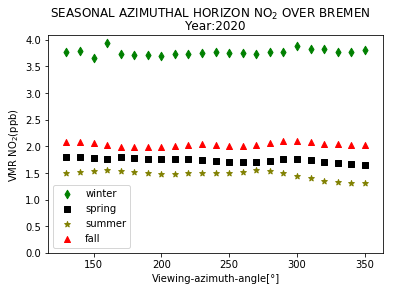

In [33]:
vazim_DJF=[] # letters DJF are dec, jan and feb respectively and so for others.
vNO2_DJF=[]
vazim_MAM=[]
vNO2_MAM=[]
vazim_JJA=[]
vNO2_JJA=[]
vazim_SON=[]
vNO2_SON=[]



month=12 or 1 or 2
for j in range(130,360):
    vazim_DJF.append(horizon_data.loc[(horizon_data['viewing-azimuth-angle']>=j) & (horizon_data['viewing-azimuth-angle']<(j+1))&(horizon_data['month']==month)&(horizon_data['L']>5000), 'viewing-azimuth-angle'].mean()) 
    vNO2_DJF.append(horizon_data.loc[(horizon_data['viewing-azimuth-angle']>=j) & (horizon_data['viewing-azimuth-angle']<(j+1))&(horizon_data['month']==month)&(horizon_data['L']>5000), 'NO2_VMR'].mean())

month=3 or 4 or 5 
for j in range(130,360):
    vazim_MAM.append(horizon_data.loc[(horizon_data['viewing-azimuth-angle']>=j) & (horizon_data['viewing-azimuth-angle']<(j+1))&(horizon_data['month']==month)&(horizon_data['L']>5000), 'viewing-azimuth-angle'].mean()) 
    vNO2_MAM.append(horizon_data.loc[(horizon_data['viewing-azimuth-angle']>=j) & (horizon_data['viewing-azimuth-angle']<(j+1))&(horizon_data['month']==month)&(horizon_data['L']>5000), 'NO2_VMR'].mean())

month=6 or 7 or 8 
for j in range(130,360):
    vazim_JJA.append(horizon_data.loc[(horizon_data['viewing-azimuth-angle']>=j) & (horizon_data['viewing-azimuth-angle']<(j+1))&(horizon_data['month']==month)&(horizon_data['L']>5000), 'viewing-azimuth-angle'].mean()) 
    vNO2_JJA.append(horizon_data.loc[(horizon_data['viewing-azimuth-angle']>=j) & (horizon_data['viewing-azimuth-angle']<(j+1))&(horizon_data['month']==month)&(horizon_data['L']>5000), 'NO2_VMR'].mean())


month=9 or 10 or 11 
for j in range(130,360):
    vazim_SON.append(horizon_data.loc[(horizon_data['viewing-azimuth-angle']>=j) & (horizon_data['viewing-azimuth-angle']<(j+1))&(horizon_data['month']==month)&(horizon_data['L']>5000), 'viewing-azimuth-angle'].mean()) 
    vNO2_SON.append(horizon_data.loc[(horizon_data['viewing-azimuth-angle']>=j) & (horizon_data['viewing-azimuth-angle']<(j+1))&(horizon_data['month']==month)&(horizon_data['L']>5000), 'NO2_VMR'].mean())
    
    
plt.scatter(vazim_DJF,vNO2_DJF, label = 'winter',marker='d', color ='green')
plt.scatter(vazim_MAM,vNO2_MAM, label ='spring',marker='s',color ='black' )
plt.scatter(vazim_JJA,vNO2_JJA, label ='summer',marker='*',color ='olive')
plt.scatter(vazim_SON,vNO2_SON,  label ='fall',marker='^',color ='red')
plt.legend()
plt.ylim(bottom=0)
#plt.ylim(top=5*1e17)
plt.suptitle('SEASONAL AZIMUTHAL HORIZON NO$_2$ OVER BREMEN')
plt.title('Year:2020') 
plt.xlabel('Viewing-azimuth-angle[°]') 
plt.ylabel('VMR NO$_2$(ppb)')
plt.show()

## D. Monthly average of NO2 VMR


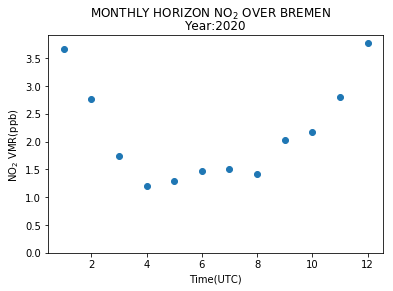

In [34]:
time_month=[]
NO2_month=[]

for month in range(1,13):
    time_month.append(horizon_data.loc[ (horizon_data['month']==month)&(horizon_data['L']>5000), 'month'].mean())
    #print(time_month)
    NO2_month.append(horizon_data.loc[(horizon_data['month']==month) &(horizon_data['L']>5000), 'NO2_VMR'].mean())

plt.scatter(time_month,NO2_month)
plt.ylim(bottom = 0)
#plt.ylim(top=5*1e17)
plt.suptitle('MONTHLY HORIZON NO$_2$ OVER BREMEN')
plt.title('Year:2020')
plt.xlabel('Time(UTC)') 
plt.ylabel('NO$_2$ VMR(ppb)')
plt.show()

## 1.6 Dependency of NO2 pollution level with meteorological parameter.

2.1230711514985052


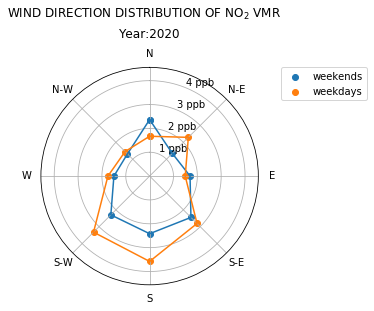

In [35]:
from windrose import WindroseAxes
import matplotlib.cm as cm
#combining all three columns to one data frame
df=np.array([WD_new, WS_new,horizon_data["NO2_VMR"],horizon_data['day-of-week-no']] ).T
#print(df)
dataframe=pd.DataFrame(df, columns=['WD','WS','VMR_NO2','DOW'])
#print(dataframe)
# taking mean of NO2 VMR in all direction

WD_N0 =dataframe.loc[(dataframe['WD']>337.5)&(dataframe['WD']<=360)& ((dataframe['DOW']==0)|(dataframe['DOW']==6)),'VMR_NO2'].mean()
print(WD_N0)
WD_N1=dataframe.loc[(dataframe['WD']>0) & (dataframe['WD']<=22.5 )& ((dataframe['DOW']==0)|(dataframe['DOW']==6)),'VMR_NO2'].mean()
WD_N=(WD_N0+WD_N1)/2
WD_NE=dataframe.loc[(dataframe['WD']>22.5) & (dataframe['WD']<=67.5)& ((dataframe['DOW']==0)|(dataframe['DOW']==6)),'VMR_NO2'].mean()
WD_E=dataframe.loc[(dataframe['WD']>67.5) & (dataframe['WD']<=112.5)& ((dataframe['DOW']==0)|(dataframe['DOW']==6)),'VMR_NO2'].mean()
WD_SE=dataframe.loc[(dataframe['WD']>112.5) & (dataframe['WD']<=157.5)& ((dataframe['DOW']==0)|(dataframe['DOW']==6)),'VMR_NO2'].mean()
WD_S=dataframe.loc[(dataframe['WD']>157.5) & (dataframe['WD']<=202.5)& ((dataframe['DOW']==0)|(dataframe['DOW']==6)),'VMR_NO2'].mean()
WD_SW=dataframe.loc[(dataframe['WD']>202.5) & (dataframe['WD']<=247.5)& ((dataframe['DOW']==0)|(dataframe['DOW']==6)),'VMR_NO2'].mean()
WD_W=dataframe.loc[(dataframe['WD']>247.5) & (dataframe['WD']<=292.5)& ((dataframe['DOW']==0)|(dataframe['DOW']==6)),'VMR_NO2'].mean()
WD_NW=dataframe.loc[(dataframe['WD']>292.5) & (dataframe['WD']<=337.5)& ((dataframe['DOW']==0)|(dataframe['DOW']==6)),'VMR_NO2'].mean()
#print(type(WD_NNE))

WD_N0_w =dataframe.loc[(dataframe['WD']>337.5)&(dataframe['WD']<=360)& ((dataframe['DOW']>0)&(dataframe['DOW']<6)),'VMR_NO2'].mean()
#print(WD_N0)
WD_N1_w=dataframe.loc[(dataframe['WD']>0) & (dataframe['WD']<=22.5 )& ((dataframe['DOW']>0)&(dataframe['DOW']<6)),'VMR_NO2'].mean()
WD_N_w=(WD_N0_w+WD_N1_w)/2
WD_NE_w=dataframe.loc[(dataframe['WD']>22.5) & (dataframe['WD']<=67.5)& ((dataframe['DOW']>0)&(dataframe['DOW']<6)),'VMR_NO2'].mean()
WD_E_w=dataframe.loc[(dataframe['WD']>67.5) & (dataframe['WD']<=112.5)& ((dataframe['DOW']>0)&(dataframe['DOW']<6)),'VMR_NO2'].mean()
WD_SE_w=dataframe.loc[(dataframe['WD']>112.5) & (dataframe['WD']<=157.5)& ((dataframe['DOW']>0)&(dataframe['DOW']<6)),'VMR_NO2'].mean()
WD_S_w=dataframe.loc[(dataframe['WD']>157.5) & (dataframe['WD']<=202.5)& ((dataframe['DOW']>0)&(dataframe['DOW']<6)),'VMR_NO2'].mean()
WD_SW_w=dataframe.loc[(dataframe['WD']>202.5) & (dataframe['WD']<=247.5)& ((dataframe['DOW']>0)&(dataframe['DOW']<6)),'VMR_NO2'].mean()
WD_W_w=dataframe.loc[(dataframe['WD']>247.5) & (dataframe['WD']<=292.5)& ((dataframe['DOW']>0)&(dataframe['DOW']<6)),'VMR_NO2'].mean()
WD_NW_w=dataframe.loc[(dataframe['WD']>292.5) & (dataframe['WD']<=337.5)& ((dataframe['DOW']>0)&(dataframe['DOW']<6)),'VMR_NO2'].mean()

day_name='Sunday'
WD_N0_a =dataframe.loc[(dataframe['WD']>337.5)&(dataframe['WD']<=360),'VMR_NO2'].mean()
#print(WD_N0)
WD_N1_a=dataframe.loc[(dataframe['WD']>0) & (dataframe['WD']<=22.5 ),'VMR_NO2'].mean()
WD_N_a=(WD_N0_a+WD_N1_a)/2
WD_NE_a=dataframe.loc[(dataframe['WD']>22.5) & (dataframe['WD']<=67.5),'VMR_NO2'].mean()
WD_E_a=dataframe.loc[(dataframe['WD']>67.5) & (dataframe['WD']<=112.5),'VMR_NO2'].mean()
WD_SE_a=dataframe.loc[(dataframe['WD']>112.5) & (dataframe['WD']<=157.5),'VMR_NO2'].mean()
WD_S_a=dataframe.loc[(dataframe['WD']>157.5) & (dataframe['WD']<=202.5),'VMR_NO2'].mean()
WD_SW_a=dataframe.loc[(dataframe['WD']>202.5) & (dataframe['WD']<=247.5),'VMR_NO2'].mean()
WD_W_a=dataframe.loc[(dataframe['WD']>247.5) & (dataframe['WD']<=292.5),'VMR_NO2'].mean()
WD_NW_a=dataframe.loc[(dataframe['WD']>292.5) & (dataframe['WD']<=337.5),'VMR_NO2'].mean()

new_wd = np.array([WD_N,WD_NE,WD_E,WD_SE,WD_S,WD_SW,WD_W,WD_NW,WD_N])
new_wd_w = np.array([WD_N_w,WD_NE_w,WD_E_w,WD_SE_w,WD_S_w,WD_SW_w,WD_W_w,WD_NW_w,WD_N_w])
new_wd_a = np.array([WD_N_a,WD_NE_a,WD_E_a,WD_SE_a,WD_S_a,WD_SW_a,WD_W_a,WD_NW_a,WD_N_a])

new_direc = np.array([0,45,90,135,180,225,270,315, 0])
# convert degrees to radiant (because polar plots are in radians)
new_direc = new_direc / 180 * np.pi
# change plot type to polar plot
ax=plt.axes(polar=True)
# define North as 0 on top
ax.set_theta_zero_location('N', offset=0)
# define direction of rotation to be clock-wise
ax.set_theta_direction(-1)
# define ticks in correct order
ax.set_xticklabels(['N', 'N-E','E', 'S-E', 'S', 'S-W', 'W', 'N-W'])
#label yticks as ppb
ax.set_yticklabels(["1 ppb",'2 ppb','3 ppb', '4 ppb', '5 ppb'])
plt.plot(new_direc, new_wd)
plt.scatter(new_direc, new_wd,label= 'weekends')
plt.plot(new_direc, new_wd_w)
plt.scatter(new_direc, new_wd_w,label= 'weekdays')

plt.legend(bbox_to_anchor=(1.5,1), borderaxespad=0)
plt.ylim(bottom = 0)
plt.suptitle('WIND DIRECTION DISTRIBUTION OF NO$_2$ VMR', y=1.09)
plt.title('Year:2020',y=1.11)
plt.show()
#ax.set_title('Title', pad=20)
plt.show()

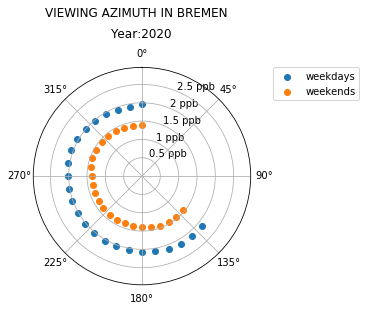

In [36]:
vazim_weekend=[]
vNO2_weekend=[]
vazim_week=[]
vNO2_week=[]

day_name='Saturday'or 'Sunday'
for j in range(130, 361):
    vazim_weekend.append(horizon_data.loc[(horizon_data['viewing-azimuth-angle']>=j) & (horizon_data['viewing-azimuth-angle']<(j+1))&((horizon_data['day-of-week-no']==0)|(horizon_data['day-of-week-no']==6))&(horizon_data['L']>5000), 'viewing-azimuth-angle'].mean()) 
    vNO2_weekend.append(horizon_data.loc[(horizon_data['viewing-azimuth-angle']>=j) & (horizon_data['viewing-azimuth-angle']<(j+1))&((horizon_data['day-of-week-no']==0)|(horizon_data['day-of-week-no']==6))&(horizon_data['L']>5000), 'NO2_VMR'].mean())


day_name=('Monday'or 'Tuesday'or'Wednesday'or'Thursday'or'Friday')
for j in range(130, 361):
    vazim_week.append(horizon_data.loc[(horizon_data['viewing-azimuth-angle']>=j) & (horizon_data['viewing-azimuth-angle']<(j+1))&((horizon_data['day-of-week-no']>0)&(horizon_data['day-of-week-no']<6))&(horizon_data['L']>5000), 'viewing-azimuth-angle'].mean()) 
    vNO2_week.append(horizon_data.loc[(horizon_data['viewing-azimuth-angle']>=j) & (horizon_data['viewing-azimuth-angle']<(j+1))&((horizon_data['day-of-week-no']>0)&(horizon_data['day-of-week-no']<6))&(horizon_data['L']>5000), 'NO2_VMR'].mean())

#new_azim = np.array([0,45,90,135,180,225,270,315, 0])
new_vazim_weekend = np.array([vazim_weekend])
#new_vazim_weekend = new_vazim_weekend / 180 * np.pi
new_vNO2_weekend=np.array([vNO2_weekend])
#new_vNO2_weekend = new_vNO2_weekend / 180 * np.pi
new_vazim_week=np.array([vazim_week])
#new_vazim_week = new_vazim_week / 180 * np.pi
new_vNO2_week=np.array([vNO2_week])
#new_vNO2_weekend = new_vNO2_weekend / 180 * np.pi


ax=plt.axes(polar=True)
# define North as 0 on top
ax.set_theta_zero_location('N', offset=0)
# define direction of rotation to be clock-wise
ax.set_theta_direction(-1)
#plt.plot(new_direc, new_wd)
plt.scatter(new_vazim_week*np.pi/180,new_vNO2_week,label= 'weekdays')
#plt.plot(new_vazim_week*np.pi/180,new_vNO2_week)
plt.scatter(new_vazim_weekend*np.pi/180,new_vNO2_weekend,label= 'weekends')
plt.legend(bbox_to_anchor=(1.5,1), borderaxespad=0)
plt.ylim(bottom = 0)
plt.suptitle('VIEWING AZIMUTH IN BREMEN', y=1.09)
ax.set_yticklabels(["0.5 ppb","1 ppb",'1.5 ppb','2 ppb', '2.5 ppb'])
plt.title('Year:2020',y=1.11)
plt.show()
#plt.plot(new_vazim_weekend*np.pi/180,new_vNO2_weekend)

In [37]:
# vazim_DJF=[] # letters DJF are dec, jan and feb respectively and so for others.
# vNO2_DJF=[]
# vazim_MAM=[]
# vNO2_MAM=[]
# vazim_JJA=[]
# vNO2_JJA=[]
# vazim_SON=[]
# vNO2_SON=[]



# month=12 or 1 or 2
# for j in range(130,360):
#     vazim_DJF.append(horizon_data.loc[(horizon_data['viewing-azimuth-angle']>=j) & (horizon_data['viewing-azimuth-angle']<(j+1))&(horizon_data['month']==month), 'viewing-azimuth-angle'].mean()) 
#     vNO2_DJF.append(horizon_data.loc[(horizon_data['viewing-azimuth-angle']>=j) & (horizon_data['viewing-azimuth-angle']<(j+1))&(horizon_data['month']==month), 'NO2'].mean())

# month=3 or 4 or 5 
# for j in range(130,360):
#     vazim_MAM.append(horizon_data.loc[(horizon_data['viewing-azimuth-angle']>=j) & (horizon_data['viewing-azimuth-angle']<(j+1))&(horizon_data['month']==month), 'viewing-azimuth-angle'].mean()) 
#     vNO2_MAM.append(horizon_data.loc[(horizon_data['viewing-azimuth-angle']>=j) & (horizon_data['viewing-azimuth-angle']<(j+1))&(horizon_data['month']==month), 'NO2'].mean())

# month=6 or 7 or 8 
# for j in range(130,360):
#     vazim_JJA.append(horizon_data.loc[(horizon_data['viewing-azimuth-angle']>=j) & (horizon_data['viewing-azimuth-angle']<(j+1))&(horizon_data['month']==month), 'viewing-azimuth-angle'].mean()) 
#     vNO2_JJA.append(horizon_data.loc[(horizon_data['viewing-azimuth-angle']>=j) & (horizon_data['viewing-azimuth-angle']<(j+1))&(horizon_data['month']==month), 'NO2'].mean())


# month=9 or 10 or 11 
# for j in range(130,360):
#     vazim_SON.append(horizon_data.loc[(horizon_data['viewing-azimuth-angle']>=j) & (horizon_data['viewing-azimuth-angle']<(j+1))&(horizon_data['month']==month), 'viewing-azimuth-angle'].mean()) 
#     vNO2_SON.append(horizon_data.loc[(horizon_data['viewing-azimuth-angle']>=j) & (horizon_data['viewing-azimuth-angle']<(j+1))&(horizon_data['month']==month), 'NO2'].mean())
    
    
# # plt.scatter(vazim_DJF,vNO2_DJF, label = 'winter', marker='p',color = 'green')
# # plt.scatter(vazim_MAM,vNO2_MAM, label ='spring',marker='d',color ='black' )
# # plt.scatter(vazim_JJA,vNO2_JJA, color = 'olive', label ='summer',marker='v')
# # plt.scatter(vazim_SON,vNO2_SON, color = 'red', label ='fall',marker='s')
# # # plt.scatter(vazim_DJF,vNO2_DJF, label = 'winter', marker='p',color = 'green')
# # # plt.scatter(vazim_MAM,vNO2_MAM, label ='spring',marker='d',color ='black' )
# # # plt.scatter(vazim_JJA,vNO2_JJA, color = 'olive', label ='summer',marker='v')
# # # plt.scatter(vazim_SON,vNO2_SON, color = 'red', label ='fall',marker='s')
# # plt.legend()
# # plt.ylim(bottom=0)
# # #plt.ylim(top=5*1e17)
# # plt.suptitle('SEASONAL AZIMUTHAL HORIZON NO$_2$ OVER BREMEN')
# # plt.title('Year:2020') 
# # plt.xlabel('Viewing-azimuth-angle[°]') 
# # plt.ylabel('NO$_2$ SC seasonal mean(molecules/cm$^2$)')
# # plt.show()
# new_vazim_DJF = np.array(vazim_DJF)
# new_vNO2_DJF=np.array(vNO2_DJF)
# new_vazim_MAM = np.array(vazim_MAM)
# new_vNO2_MAM=np.array(vNO2_MAM)
# new_vazim_JJA = np.array(vazim_JJA)
# new_vNO2_JJA=np.array(vNO2_JJA)
# new_vazim_SON = np.array(vazim_SON)
# new_vNO2_SON=np.array(vNO2_SON)
# ax=plt.axes(polar=True)
# # define North as 0 on top
# ax.set_theta_zero_location('N', offset=0)
# # define direction of rotation to be clock-wise
# ax.set_theta_direction(-1)
# plt.scatter(new_vazim_DJF*np.pi/180,new_vNO2_DJF, label = 'winter', marker='p',color = 'green')
# plt.scatter(new_vazim_MAM*np.pi/180,new_vNO2_MAM, label ='spring',marker='d',color ='black' )
# plt.scatter(new_vazim_JJA*np.pi/180,new_vNO2_JJA, color = 'olive', label ='summer',marker='v')
# plt.scatter(new_vazim_SON*np.pi/180,new_vNO2_SON, color = 'red', label ='fall',marker='s')
# # plt.scatter(vazim_DJF,vNO2_DJF, label = 'winter', marker='p',color = 'green')
# # plt.scatter(vazim_MAM,vNO2_MAM, label ='spring',marker='d',color ='black' )
# # plt.scatter(vazim_JJA,vNO2_JJA, color = 'olive', label ='summer',marker='v')
# # plt.scatter(vazim_SON,vNO2_SON, color = 'red', label ='fall',marker='s')
# plt.legend()
# plt.ylim(bottom=0)
# #plt.ylim(top=5*1e17)
# plt.legend(bbox_to_anchor=(1.5,1), borderaxespad=0)
# #plt.ylim(bottom = 0)
# plt.suptitle('SEASONAL VIEWING AZIMUTH ANGLE AT BREMEN', y=1.09)
# ax.set_yticklabels(['1 ppb','2 ppb','3 ppb','4 ppb','5 ppb'])
# plt.title('Year:2020',y=1.11)
# plt.show()

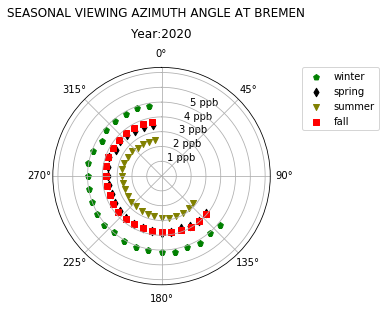

In [38]:
vazim_DJF=[] # letters DJF are dec, jan and feb respectively and so for others.
vNO2_DJF=[]
vazim_MAM=[]
vNO2_MAM=[]
vazim_JJA=[]
vNO2_JJA=[]
vazim_SON=[]
vNO2_SON=[]



month=12 or 1 or 2
for j in range(130,360):
    vazim_DJF.append(horizon_data.loc[(horizon_data['viewing-azimuth-angle']>=j) & (horizon_data['viewing-azimuth-angle']<(j+1))&(horizon_data['month']==month), 'viewing-azimuth-angle'].mean()) 
    vNO2_DJF.append(horizon_data.loc[(horizon_data['viewing-azimuth-angle']>=j) & (horizon_data['viewing-azimuth-angle']<(j+1))&(horizon_data['month']==month), 'NO2'].mean())

month=3 or 4 or 5 
for j in range(130,360):
    vazim_MAM.append(horizon_data.loc[(horizon_data['viewing-azimuth-angle']>=j) & (horizon_data['viewing-azimuth-angle']<(j+1))&(horizon_data['month']==month), 'viewing-azimuth-angle'].mean()) 
    vNO2_MAM.append(horizon_data.loc[(horizon_data['viewing-azimuth-angle']>=j) & (horizon_data['viewing-azimuth-angle']<(j+1))&(horizon_data['month']==month), 'NO2'].mean())

month=6 or 7 or 8 
for j in range(130,360):
    vazim_JJA.append(horizon_data.loc[(horizon_data['viewing-azimuth-angle']>=j) & (horizon_data['viewing-azimuth-angle']<(j+1))&(horizon_data['month']==month), 'viewing-azimuth-angle'].mean()) 
    vNO2_JJA.append(horizon_data.loc[(horizon_data['viewing-azimuth-angle']>=j) & (horizon_data['viewing-azimuth-angle']<(j+1))&(horizon_data['month']==month), 'NO2'].mean())


month=9 or 10 or 11 
for j in range(130,360):
    vazim_SON.append(horizon_data.loc[(horizon_data['viewing-azimuth-angle']>=j) & (horizon_data['viewing-azimuth-angle']<(j+1))&(horizon_data['month']==month), 'viewing-azimuth-angle'].mean()) 
    vNO2_SON.append(horizon_data.loc[(horizon_data['viewing-azimuth-angle']>=j) & (horizon_data['viewing-azimuth-angle']<(j+1))&(horizon_data['month']==month), 'NO2'].mean())
    
    
new_vazim_DJF = np.array(vazim_DJF)
new_vNO2_DJF=np.array(vNO2_DJF)
new_vazim_MAM = np.array(vazim_MAM)
new_vNO2_MAM=np.array(vNO2_MAM)
new_vazim_JJA = np.array(vazim_JJA)
new_vNO2_JJA=np.array(vNO2_JJA)
new_vazim_SON = np.array(vazim_SON)
new_vNO2_SON=np.array(vNO2_SON)
ax=plt.axes(polar=True)
# define North as 0 on top
ax.set_theta_zero_location('N', offset=0)
# define direction of rotation to be clock-wise
ax.set_theta_direction(-1)
plt.scatter(new_vazim_DJF*np.pi/180,new_vNO2_DJF, label = 'winter', marker='p',color = 'green')
plt.scatter(new_vazim_MAM*np.pi/180,new_vNO2_MAM, label ='spring',marker='d',color ='black' )
plt.scatter(new_vazim_JJA*np.pi/180,new_vNO2_JJA, color = 'olive', label ='summer',marker='v')
plt.scatter(new_vazim_SON*np.pi/180,new_vNO2_SON, color = 'red', label ='fall',marker='s')
# plt.scatter(vazim_DJF,vNO2_DJF, label = 'winter', marker='p',color = 'green')
# plt.scatter(vazim_MAM,vNO2_MAM, label ='spring',marker='d',color ='black' )
# plt.scatter(vazim_JJA,vNO2_JJA, color = 'olive', label ='summer',marker='v')
# plt.scatter(vazim_SON,vNO2_SON, color = 'red', label ='fall',marker='s')
plt.legend()
plt.ylim(bottom=0)
#plt.ylim(top=5*1e17)
plt.legend(bbox_to_anchor=(1.5,1), borderaxespad=0)
#plt.ylim(bottom = 0)
plt.suptitle('SEASONAL VIEWING AZIMUTH ANGLE AT BREMEN', y=1.09)
ax.set_yticklabels(['1 ppb','2 ppb','3 ppb','4 ppb','5 ppb'])
plt.title('Year:2020',y=1.11)
plt.show()

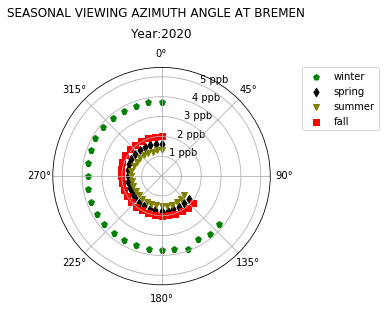

In [51]:
vazim_DJF=[] # letters DJF are dec, jan and feb respectively and so for others.
vNO2_DJF=[]
vazim_MAM=[]
vNO2_MAM=[]
vazim_JJA=[]
vNO2_JJA=[]
vazim_SON=[]
vNO2_SON=[]
MIN_COUNT=200
count=[]
month=12 or 1 or 2
for j in range(130,361):# (3,20);3 A.M. is the starting time of the day and 19 P.M. is the ending one through ALL months. Python takes 3 as it is but for second no. it takes 1 less.
    if (horizon_data.loc[(horizon_data['viewing-azimuth-angle']>=j) & (horizon_data['viewing-azimuth-angle']<(j+1))&(horizon_data['month']==month), 'NO2_VMR'].count()) > MIN_COUNT:
        vazim_DJF.append(horizon_data.loc[(horizon_data['viewing-azimuth-angle']>=j) & (horizon_data['viewing-azimuth-angle']<(j+1))&(horizon_data['month']==month)&(horizon_data['L']>5000), 'viewing-azimuth-angle'].mean()) 
        vNO2_DJF.append(horizon_data.loc[(horizon_data['viewing-azimuth-angle']>=j) & (horizon_data['viewing-azimuth-angle']<(j+1))&(horizon_data['month']==month)&(horizon_data['L']>5000), 'NO2_VMR'].mean())
    count.append(horizon_data.loc[(horizon_data['viewing-azimuth-angle']>=j) & (horizon_data['viewing-azimuth-angle']<(j+1))&(horizon_data['month']==month)&(horizon_data['L']>5000), 'NO2_VMR'].count())
    
#print(count)
month=3 or 4 or 5
for j in range(130,361):# (3,20);3 A.M. is the starting time of the day and 19 P.M. is the ending one through ALL months. Python takes 3 as it is but for second no. it takes 1 less.
    if (horizon_data.loc[(horizon_data['viewing-azimuth-angle']>=j) & (horizon_data['viewing-azimuth-angle']<(j+1))&(horizon_data['month']==month), 'NO2_VMR'].count()) > MIN_COUNT:
        vazim_MAM.append(horizon_data.loc[(horizon_data['viewing-azimuth-angle']>=j) & (horizon_data['viewing-azimuth-angle']<(j+1))&(horizon_data['month']==month)&(horizon_data['L']>5000), 'viewing-azimuth-angle'].mean()) 
        vNO2_MAM.append(horizon_data.loc[(horizon_data['viewing-azimuth-angle']>=j) & (horizon_data['viewing-azimuth-angle']<(j+1))&(horizon_data['month']==month)&(horizon_data['L']>5000), 'NO2_VMR'].mean())
    count.append(horizon_data.loc[(horizon_data['viewing-azimuth-angle']>=j) & (horizon_data['viewing-azimuth-angle']<(j+1))&(horizon_data['month']==month)&(horizon_data['L']>5000), 'NO2_VMR'].count())
    
#print(count)
month=6 or 7 or 8
for j in range(130,361):# (3,20);3 A.M. is the starting time of the day and 19 P.M. is the ending one through ALL months. Python takes 3 as it is but for second no. it takes 1 less.
    if (horizon_data.loc[(horizon_data['viewing-azimuth-angle']>=j) & (horizon_data['viewing-azimuth-angle']<(j+1))&(horizon_data['month']==month), 'NO2_VMR'].count()) > MIN_COUNT:
        vazim_JJA.append(horizon_data.loc[(horizon_data['viewing-azimuth-angle']>=j) & (horizon_data['viewing-azimuth-angle']<(j+1))&(horizon_data['month']==month)&(horizon_data['L']>5000), 'viewing-azimuth-angle'].mean()) 
        vNO2_JJA.append(horizon_data.loc[(horizon_data['viewing-azimuth-angle']>=j) & (horizon_data['viewing-azimuth-angle']<(j+1))&(horizon_data['month']==month)&(horizon_data['L']>5000), 'NO2_VMR'].mean())
    count.append(horizon_data.loc[(horizon_data['viewing-azimuth-angle']>=j) & (horizon_data['viewing-azimuth-angle']<(j+1))&(horizon_data['month']==month)&(horizon_data['L']>5000), 'NO2_VMR'].count())
    
#print(count)
month=9 or 10 or 11
for j in range(130,361):# (3,20);3 A.M. is the starting time of the day and 19 P.M. is the ending one through ALL months. Python takes 3 as it is but for second no. it takes 1 less.
    if (horizon_data.loc[(horizon_data['viewing-azimuth-angle']>=j) & (horizon_data['viewing-azimuth-angle']<(j+1))&(horizon_data['month']==month), 'NO2_VMR'].count()) > MIN_COUNT:
        vazim_SON.append(horizon_data.loc[(horizon_data['viewing-azimuth-angle']>=j) & (horizon_data['viewing-azimuth-angle']<(j+1))&(horizon_data['month']==month)&(horizon_data['L']>5000), 'viewing-azimuth-angle'].mean()) 
        vNO2_SON.append(horizon_data.loc[(horizon_data['viewing-azimuth-angle']>=j) & (horizon_data['viewing-azimuth-angle']<(j+1))&(horizon_data['month']==month)&(horizon_data['L']>5000), 'NO2_VMR'].mean())
    count.append(horizon_data.loc[(horizon_data['viewing-azimuth-angle']>=j) & (horizon_data['viewing-azimuth-angle']<(j+1))&(horizon_data['month']==month)&(horizon_data['L']>5000), 'NO2_VMR'].count())
    
#print(count)
new_vazim_DJF = np.array(vazim_DJF)
new_vNO2_DJF=np.array(vNO2_DJF)
new_vazim_MAM = np.array(vazim_MAM)
new_vNO2_MAM=np.array(vNO2_MAM)
new_vazim_JJA = np.array(vazim_JJA)
new_vNO2_JJA=np.array(vNO2_JJA)
new_vazim_SON = np.array(vazim_SON)
new_vNO2_SON=np.array(vNO2_SON)
ax=plt.axes(polar=True)
# define North as 0 on top
ax.set_theta_zero_location('N', offset=0)
# define direction of rotation to be clock-wise
ax.set_theta_direction(-1)
plt.scatter(new_vazim_DJF*np.pi/180,new_vNO2_DJF, label = 'winter', marker='p',color = 'green')
plt.scatter(new_vazim_MAM*np.pi/180,new_vNO2_MAM, label ='spring',marker='d',color ='black' )
plt.scatter(new_vazim_JJA*np.pi/180,new_vNO2_JJA, color = 'olive', label ='summer',marker='v')
plt.scatter(new_vazim_SON*np.pi/180,new_vNO2_SON, color = 'red', label ='fall',marker='s')
# plt.scatter(vazim_DJF,vNO2_DJF, label = 'winter', marker='p',color = 'green')
# plt.scatter(vazim_MAM,vNO2_MAM, label ='spring',marker='d',color ='black' )
# plt.scatter(vazim_JJA,vNO2_JJA, color = 'olive', label ='summer',marker='v')
# plt.scatter(vazim_SON,vNO2_SON, color = 'red', label ='fall',marker='s')
plt.legend()
plt.ylim(bottom=0)
#plt.ylim(top=5*1e17)
plt.legend(bbox_to_anchor=(1.5,1), borderaxespad=0)
#plt.ylim(bottom = 0)
plt.suptitle('SEASONAL VIEWING AZIMUTH ANGLE AT BREMEN', y=1.09)
ax.set_yticklabels(['1 ppb','2 ppb','3 ppb','4 ppb','5 ppb'])
plt.title('Year:2020',y=1.11)
plt.show()

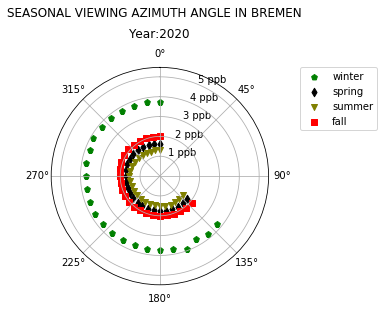

In [33]:
vazim_DJF=[] # letters DJF are dec, jan and feb respectively and so for others.
vNO2_DJF=[]
vazim_MAM=[]
vNO2_MAM=[]
vazim_JJA=[]
vNO2_JJA=[]
vazim_SON=[]
vNO2_SON=[]



month=12 or 1 or 2
for j in range(130,361):
    vazim_DJF.append(horizon_data.loc[(horizon_data['viewing-azimuth-angle']>=j) & (horizon_data['viewing-azimuth-angle']<(j+1))&(horizon_data['month']==month)&(horizon_data['L']>5000), 'viewing-azimuth-angle'].mean()) 
    vNO2_DJF.append(horizon_data.loc[(horizon_data['viewing-azimuth-angle']>=j) & (horizon_data['viewing-azimuth-angle']<(j+1))&(horizon_data['month']==month)&(horizon_data['L']>5000), 'NO2_VMR'].mean())

month=3 or 4 or 5 
for j in range(130,361):
    vazim_MAM.append(horizon_data.loc[(horizon_data['viewing-azimuth-angle']>=j) & (horizon_data['viewing-azimuth-angle']<(j+1))&(horizon_data['month']==month)&(horizon_data['L']>5000), 'viewing-azimuth-angle'].mean()) 
    vNO2_MAM.append(horizon_data.loc[(horizon_data['viewing-azimuth-angle']>=j) & (horizon_data['viewing-azimuth-angle']<(j+1))&(horizon_data['month']==month)&(horizon_data['L']>5000), 'NO2_VMR'].mean())

month=6 or 7 or 8 
for j in range(130,361):
    vazim_JJA.append(horizon_data.loc[(horizon_data['viewing-azimuth-angle']>=j) & (horizon_data['viewing-azimuth-angle']<(j+1))&(horizon_data['month']==month)&(horizon_data['L']>5000), 'viewing-azimuth-angle'].mean()) 
    vNO2_JJA.append(horizon_data.loc[(horizon_data['viewing-azimuth-angle']>=j) & (horizon_data['viewing-azimuth-angle']<(j+1))&(horizon_data['month']==month)&(horizon_data['L']>5000), 'NO2_VMR'].mean())


month=9 or 10 or 11 
for j in range(130,361):
    vazim_SON.append(horizon_data.loc[(horizon_data['viewing-azimuth-angle']>=j) & (horizon_data['viewing-azimuth-angle']<(j+1))&(horizon_data['month']==month)&(horizon_data['L']>5000), 'viewing-azimuth-angle'].mean()) 
    vNO2_SON.append(horizon_data.loc[(horizon_data['viewing-azimuth-angle']>=j) & (horizon_data['viewing-azimuth-angle']<(j+1))&(horizon_data['month']==month)&(horizon_data['L']>5000), 'NO2_VMR'].mean())
    
new_vazim_DJF = np.array(vazim_DJF)
new_vNO2_DJF=np.array(vNO2_DJF)
new_vazim_MAM = np.array(vazim_MAM)
new_vNO2_MAM=np.array(vNO2_MAM)
new_vazim_JJA = np.array(vazim_JJA)
new_vNO2_JJA=np.array(vNO2_JJA)
new_vazim_SON = np.array(vazim_SON)
new_vNO2_SON=np.array(vNO2_SON)
ax=plt.axes(polar=True)
# define North as 0 on top
ax.set_theta_zero_location('N', offset=0)
# define direction of rotation to be clock-wise
ax.set_theta_direction(-1)
plt.scatter(new_vazim_DJF*np.pi/180,new_vNO2_DJF, label = 'winter', marker='p',color = 'green')
plt.scatter(new_vazim_MAM*np.pi/180,new_vNO2_MAM, label ='spring',marker='d',color ='black' )
plt.scatter(new_vazim_JJA*np.pi/180,new_vNO2_JJA, color = 'olive', label ='summer',marker='v')
plt.scatter(new_vazim_SON*np.pi/180,new_vNO2_SON, color = 'red', label ='fall',marker='s')
# plt.scatter(vazim_DJF,vNO2_DJF, label = 'winter', marker='p',color = 'green')
# plt.scatter(vazim_MAM,vNO2_MAM, label ='spring',marker='d',color ='black' )
# plt.scatter(vazim_JJA,vNO2_JJA, color = 'olive', label ='summer',marker='v')
# plt.scatter(vazim_SON,vNO2_SON, color = 'red', label ='fall',marker='s')
plt.legend()
plt.ylim(bottom=0)
#plt.ylim(top=5*1e17)
plt.legend(bbox_to_anchor=(1.5,1), borderaxespad=0)
#plt.ylim(bottom = 0)
plt.suptitle('SEASONAL VIEWING AZIMUTH ANGLE IN BREMEN', y=1.09)
ax.set_yticklabels(['1 ppb','2 ppb','3 ppb','4 ppb','5 ppb'])
plt.title('Year:2020',y=1.11)
plt.show()

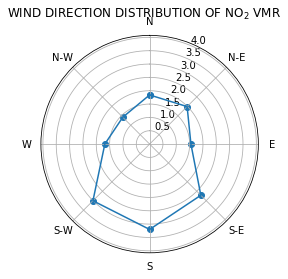

In [26]:
from windrose import WindroseAxes
import matplotlib.cm as cm
#combining all three columns to one data frame
df=np.array([WD_new, WS_new,horizon_data["NO2_VMR"]] ).T
#print(df)
dataframe=pd.DataFrame(df, columns=['WD','WS','VMR_NO2'])
# taking mean of NO2 VMR in all direction


WD_N0 =dataframe.loc[(dataframe['WD']>337.5)&(dataframe['WD']<=360),'VMR_NO2'].mean()
#print(WD_N0)
WD_N1=dataframe.loc[(dataframe['WD']>0) & (dataframe['WD']<=22.5 ),'VMR_NO2'].mean()
WD_N=(WD_N0+WD_N1)/2
WD_NE=dataframe.loc[(dataframe['WD']>22.5) & (dataframe['WD']<=67.5),'VMR_NO2'].mean()
WD_E=dataframe.loc[(dataframe['WD']>67.5) & (dataframe['WD']<=112.5),'VMR_NO2'].mean()
WD_SE=dataframe.loc[(dataframe['WD']>112.5) & (dataframe['WD']<=157.5),'VMR_NO2'].mean()
WD_S=dataframe.loc[(dataframe['WD']>157.5) & (dataframe['WD']<=202.5),'VMR_NO2'].mean()
WD_SW=dataframe.loc[(dataframe['WD']>202.5) & (dataframe['WD']<=247.5),'VMR_NO2'].mean()
WD_W=dataframe.loc[(dataframe['WD']>247.5) & (dataframe['WD']<=292.5),'VMR_NO2'].mean()
WD_NW=dataframe.loc[(dataframe['WD']>292.5) & (dataframe['WD']<=337.5),'VMR_NO2'].mean()
#print(type(WD_NNE))

new_wd = np.array([WD_N,WD_NE,WD_E,WD_SE,WD_S,WD_SW,WD_W,WD_NW,WD_N])
#print(new_wd)
new_direc = np.array([0,45,90,135,180,225,270,315, 0])
# convert degrees to radiant (because polar plots are in radians)
new_direc = new_direc / 180 * np.pi
# change plot type to polar plot
ax=plt.axes(polar=True)
# define North as 0 on top
ax.set_theta_zero_location('N', offset=0)
# define direction of rotation to be clock-wise
ax.set_theta_direction(-1)
# define ticks in correct order
ax.set_xticklabels(['N', 'N-E','E', 'S-E', 'S', 'S-W', 'W', 'N-W'])
plt.plot(new_direc, new_wd)
plt.scatter(new_direc, new_wd)
plt.ylim(bottom = 0)
plt.suptitle('WIND DIRECTION DISTRIBUTION OF NO$_2$ VMR')
#plt.title('Year:2020')
plt.show()
#ax.set_title('WIND DIRECTION DISTRIBUTION OF NO$_2$ VMR')


In [ ]:
met_data['wind_direction'].min()

## 1.7 Dependency of NO2 pollution level with speed

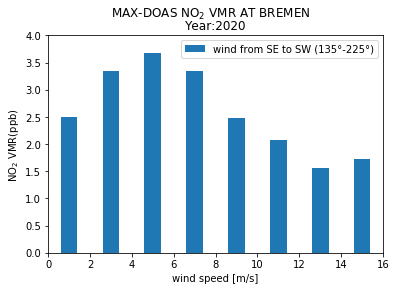

In [49]:
ws_0_2 =dataframe.loc[(dataframe['WD']>135) & (dataframe['WD']<=225 )&(dataframe['WS']<=2),'VMR_NO2'].mean()
ws_2_4 =dataframe.loc[(dataframe['WD']>135) & (dataframe['WD']<=225 )&(dataframe['WS']>2),'VMR_NO2'].mean()
ws_4_6 =dataframe.loc[(dataframe['WD']>135) & (dataframe['WD']<=225 )&(dataframe['WS']>4)&(dataframe['WS']<=6),'VMR_NO2'].mean()
ws_6_8 =dataframe.loc[(dataframe['WD']>135) & (dataframe['WD']<=225 )&(dataframe['WS']>6)&(dataframe['WS']<=8),'VMR_NO2'].mean()
ws_8_10 =dataframe.loc[(dataframe['WD']>135) & (dataframe['WD']<=225 )&(dataframe['WS']>8)&(dataframe['WS']<=10),'VMR_NO2'].mean()
ws_10_12 =dataframe.loc[(dataframe['WD']>135) & (dataframe['WD']<=225 )&(dataframe['WS']>10)&(dataframe['WS']<=12),'VMR_NO2'].mean()
ws_12_14 =dataframe.loc[(dataframe['WD']>135) & (dataframe['WD']<=225 )&(dataframe['WS']>12)&(dataframe['WS']<=14),'VMR_NO2'].mean()
ws_14_16 =dataframe.loc[(dataframe['WD']>135) & (dataframe['WD']<=225 )&(dataframe['WS']>14)&(dataframe['WS']<=16),'VMR_NO2'].mean()
ws_16_18 =dataframe.loc[(dataframe['WD']>135) & (dataframe['WD']<=225 )&(dataframe['WS']>16)&(dataframe['WS']<=18),'VMR_NO2'].mean()
new_ws = np.array([ws_0_2, ws_2_4, ws_4_6, ws_6_8, ws_8_10, ws_10_12, ws_12_14, ws_14_16, ws_16_18])
new_speed = np.array([1, 3, 5, 7, 9, 11, 13, 15, 17])

plt.bar(new_speed, new_ws,label = 'wind from SE to SW (135°-225°)')
#plt.bar(new_speed, new_ws_w,label = 'weekdays')
plt.legend()
#plt.scatter(dataframe['WS'], dataframe['NO2'])
plt.ylim(bottom = 0)
plt.ylim(top=4)
plt.xlim(0,16)
#plt.ylim(top=5*1e17)
plt.suptitle('MAX-DOAS NO$_2$ VMR AT BREMEN')
plt.title('Year:2020')
plt.xlabel('wind speed [m/s]') 
plt.ylabel('NO$_2$ VMR(ppb)')
plt.show()

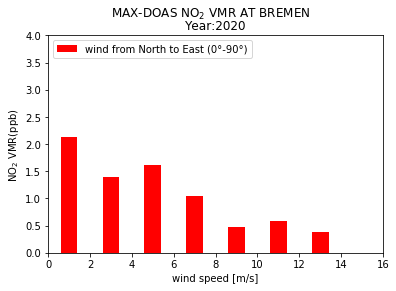

In [30]:
ws_0_2 =dataframe.loc[(dataframe['WD']>0) & (dataframe['WD']<=90 )&(dataframe['WS']<=2),'VMR_NO2'].mean()
ws_2_4 =dataframe.loc[(dataframe['WD']>0) & (dataframe['WD']<=90 )&(dataframe['WS']>2),'VMR_NO2'].mean()
ws_4_6 =dataframe.loc[(dataframe['WD']>0) & (dataframe['WD']<=90 )&(dataframe['WS']>4)&(dataframe['WS']<=6),'VMR_NO2'].mean()
ws_6_8 =dataframe.loc[(dataframe['WD']>0) & (dataframe['WD']<=90 )&(dataframe['WS']>6)&(dataframe['WS']<=8),'VMR_NO2'].mean()
ws_8_10 =dataframe.loc[(dataframe['WD']>0) & (dataframe['WD']<=90 )&(dataframe['WS']>8)&(dataframe['WS']<=10),'VMR_NO2'].mean()
ws_10_12 =dataframe.loc[(dataframe['WD']>0) & (dataframe['WD']<=90 )&(dataframe['WS']>10)&(dataframe['WS']<=12),'VMR_NO2'].mean()
ws_12_14 =dataframe.loc[(dataframe['WD']>0) & (dataframe['WD']<=90 )&(dataframe['WS']>12)&(dataframe['WS']<=14),'VMR_NO2'].mean()
ws_14_16 =dataframe.loc[(dataframe['WD']>0) & (dataframe['WD']<=90 )&(dataframe['WS']>14)&(dataframe['WS']<=16),'VMR_NO2'].mean()
ws_16_18 =dataframe.loc[(dataframe['WD']>0) & (dataframe['WD']<=90 )&(dataframe['WS']>16)&(dataframe['WS']<=18),'VMR_NO2'].mean()
new_ws = np.array([ws_0_2, ws_2_4, ws_4_6, ws_6_8, ws_8_10, ws_10_12, ws_12_14, ws_14_16, ws_16_18])
new_speed = np.array([1, 3, 5, 7, 9, 11, 13, 15, 17])

plt.bar(new_speed, new_ws,label = 'wind from North to East (0°-90°)',color = 'red')
#plt.bar(new_speed, new_ws_w,label = 'weekdays')
plt.legend()
#plt.scatter(dataframe['WS'], dataframe['NO2'])
plt.ylim(bottom = 0)
plt.ylim(top=4)
plt.xlim(0,16)
plt.suptitle('MAX-DOAS NO$_2$ VMR AT BREMEN')
plt.title('Year:2020')
plt.xlabel('wind speed [m/s]') 
plt.ylabel('NO$_2$ VMR(ppb)')
plt.show()

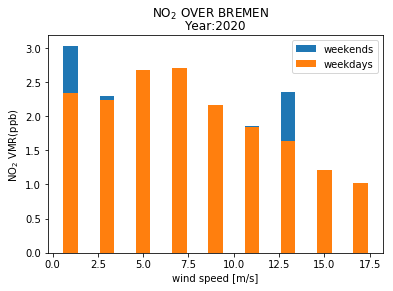

In [69]:
ws_0_2 =dataframe.loc[(dataframe['WS']<=2)&((dataframe['DOW']==0)|(dataframe['DOW']==6)),'VMR_NO2'].mean()
ws_2_4 =dataframe.loc[(dataframe['WS']>2)&(dataframe['WS']<=4)&((dataframe['DOW']==0)|(dataframe['DOW']==6)),'VMR_NO2'].mean()
ws_4_6 =dataframe.loc[(dataframe['WS']>4)&(dataframe['WS']<=6)&((dataframe['DOW']==0)|(dataframe['DOW']==6)),'VMR_NO2'].mean()
ws_6_8 =dataframe.loc[(dataframe['WS']>6)&(dataframe['WS']<=8)&((dataframe['DOW']==0)|(dataframe['DOW']==6)),'VMR_NO2'].mean()
ws_8_10 =dataframe.loc[(dataframe['WS']>8)&(dataframe['WS']<=10)&((dataframe['DOW']==0)|(dataframe['DOW']==6)),'VMR_NO2'].mean()
ws_10_12 =dataframe.loc[(dataframe['WS']>10)&(dataframe['WS']<=12)&((dataframe['DOW']==0)|(dataframe['DOW']==6)),'VMR_NO2'].mean()
ws_12_14 =dataframe.loc[(dataframe['WS']>12)&(dataframe['WS']<=14)&((dataframe['DOW']==0)|(dataframe['DOW']==6)),'VMR_NO2'].mean()
ws_14_16 =dataframe.loc[(dataframe['WS']>14)&(dataframe['WS']<=16)&((dataframe['DOW']==0)|(dataframe['DOW']==6)),'VMR_NO2'].mean()
ws_16_18 =dataframe.loc[(dataframe['WS']>16)&(dataframe['WS']<=18)&((dataframe['DOW']==0)|(dataframe['DOW']==6)),'VMR_NO2'].mean()


ws_0_2_w =dataframe.loc[(dataframe['WS']<=2)&((dataframe['DOW']>0)&(dataframe['DOW']<6)),'VMR_NO2'].mean()
ws_2_4_w =dataframe.loc[(dataframe['WS']>2)&(dataframe['WS']<=4)&((dataframe['DOW']>0)&(dataframe['DOW']<6)),'VMR_NO2'].mean()
ws_4_6_w =dataframe.loc[(dataframe['WS']>4)&(dataframe['WS']<=6)&((dataframe['DOW']>0)&(dataframe['DOW']<6)),'VMR_NO2'].mean()
ws_6_8_w =dataframe.loc[(dataframe['WS']>6)&(dataframe['WS']<=8)&((dataframe['DOW']>0)&(dataframe['DOW']<6)),'VMR_NO2'].mean()
ws_8_10_w =dataframe.loc[(dataframe['WS']>8)&(dataframe['WS']<=10)&((dataframe['DOW']>0)&(dataframe['DOW']<6)),'VMR_NO2'].mean()
ws_10_12_w =dataframe.loc[(dataframe['WS']>10)&(dataframe['WS']<=12)&((dataframe['DOW']>0)&(dataframe['DOW']<6)),'VMR_NO2'].mean()
ws_12_14_w =dataframe.loc[(dataframe['WS']>12)&(dataframe['WS']<=14)&((dataframe['DOW']>0)&(dataframe['DOW']<6)),'VMR_NO2'].mean()
ws_14_16_w =dataframe.loc[(dataframe['WS']>14)&(dataframe['WS']<=16)&((dataframe['DOW']>0)&(dataframe['DOW']<6)),'VMR_NO2'].mean()
ws_16_18_w =dataframe.loc[(dataframe['WS']>16)&(dataframe['WS']<=18)&((dataframe['DOW']>0)&(dataframe['DOW']<6)),'VMR_NO2'].mean()

new_ws = np.array([ws_0_2, ws_2_4, ws_4_6, ws_6_8, ws_8_10, ws_10_12, ws_12_14, ws_14_16, ws_16_18])
new_ws_w = np.array([ws_0_2_w, ws_2_4_w, ws_4_6_w, ws_6_8_w, ws_8_10_w, ws_10_12_w, ws_12_14_w, ws_14_16_w, ws_16_18_w])
#print(new_ws)
new_speed = np.array([1, 3, 5, 7, 9, 11, 13, 15, 17])

plt.bar(new_speed, new_ws,label = 'weekends')
plt.bar(new_speed, new_ws_w,label = 'weekdays')
plt.legend()
#plt.scatter(dataframe['WS'], dataframe['NO2'])
plt.ylim(bottom = 0)
#plt.ylim(top=5*1e17)
plt.suptitle('NO$_2$ OVER BREMEN')
plt.title('Year:2020')
plt.xlabel('wind speed [m/s]') 
plt.ylabel('NO$_2$ VMR(ppb)')
plt.show()

In [41]:
# inserting column of met_data in horizon_data
horizon_data['wind_direc']=met_data['wind_direction']
horizon_data['wind_speed']=met_data['wind_speed']

In [40]:
# gathering the data ranges between 130 to 190
data_south =horizon_data[horizon_data['wind_direc'].between(130, 190)]
data_south['wind_speed'].min()
#data_south

0.1

In [44]:
import seaborn as sns
WS_sp_1=[(data_south['wind_speed']>0) & (data_south['wind_speed']<=2),'wind_speed']
print(WS_sp_1)
WS_sp_2=[(data_south['wind_speed']>2) & (data_south['wind_speed']<=4),'wind_speed']
WS_sp_3=[(data_south['wind_speed']>4) & (data_south['wind_speed']<=6),'wind_speed']
WS_sp_4=[(data_south['wind_speed']>6) & (data_south['wind_speed']<=8),'wind_speed']
WS_sp_5=[(data_south['wind_speed']>8) & (data_south['wind_speed']<=10),'wind_speed']
WS_sp_6=[(data_south['wind_speed']>10) & (data_south['wind_speed']<=12),'wind_speed']
WS_sp_7=[(data_south['wind_speed']>12) & (data_south['wind_speed']<=14),'wind_speed']
WS_sp_8=[(data_south['wind_speed']>14) & (data_south['wind_speed']<=16),'wind_speed']

# WS_1=data_south.loc[(data_south['wind_speed']>0) & (data_south['wind_speed']<=2),'NO2_VMR'].mean()
# WS_2=data_south.loc[(data_south['wind_speed']>2) & (data_south['wind_speed']<=4),'NO2_VMR'].mean()
# WS_3=data_south.loc[(data_south['wind_speed']>4) & (data_south['wind_speed']<=6),'NO2_VMR'].mean()
# WS_4=data_south.loc[(data_south['wind_speed']>6) & (data_south['wind_speed']<=8),'NO2_VMR'].mean()
# WS_5=data_south.loc[(data_south['wind_speed']>8) & (data_south['wind_speed']<=10),'NO2_VMR'].mean()
# WS_6=data_south.loc[(data_south['wind_speed']>10) & (data_south['wind_speed']<=12),'NO2_VMR'].mean()
# WS_7=data_south.loc[(data_south['wind_speed']>12) & (data_south['wind_speed']<=14),'NO2_VMR'].mean()
# WS_8=data_south.loc[(data_south['wind_speed']>14) & (data_south['wind_speed']<=16),'NO2_VMR'].mean()

[0         True
1         True
3         True
4         True
5         True
6         True
7         True
9         True
10        True
11        True
15        True
16        True
17        True
18        True
19        True
39        True
40        True
47        True
48        True
50        True
54        True
55        True
56       False
57        True
58        True
59        True
60        True
61        True
62        True
63        True
         ...  
52602    False
52603    False
52605    False
52606    False
52609    False
52612    False
52614    False
52615    False
52616    False
52617    False
52618    False
52619    False
52622    False
52623    False
52649    False
52650    False
52651    False
52652    False
52653    False
52654     True
52672     True
52673    False
52677    False
52678    False
52679    False
52680    False
52681    False
52682     True
52687    False
52688    False
Name: wind_speed, Length: 10592, dtype: bool, 'wind_speed']


In [149]:

import seaborn as sns
horizon_data['wind_direc']=met_data['wind_direction']
horizon_data['wind_speed']=met_data['wind_speed']

NO2_180=[]
speed_180=[]
NO2_360=[]
speed_360=[]
NO2_180_a=[]
NO2_180_b=[]
speed_180_a=[]
speed_180_b=[]


for j in range(130, 190,10):# wind direction 135 to 180. since 135 is not in wind direc column. starting from 130. 
    NO2_S.append(horizon_data.loc[(horizon_data['wind_direc']==j), 'NO2_VMR']) 
    speed_180.append(horizon_data.loc[(horizon_data['wind_direc']==j), 'wind_speed']) 
#print( NO2_180)
data=pd.DataFrame(list(zip(NO2_180,speed_180)),columns=['NO180','speed_180'])
print(data)
for i in data['speed_180']:
    if(0<=i<=4):
        NO2_180_a.append(data.loc[(data['speed_180']>=i) &(data['speed_180']<i+1), 'NO180'].mean())
        speed_180_a.append(round((data.loc[(data['speed_180']>=i) &(data['speed_180']<i+1), 'speed_180'].mean())))


print(speed_180_a)
#data['NO180a']=np.array(NO2_180_a)
#data['speed_180a']=np.array(speed_180_a)      
#print(data)
#print(NO2_180_a)
bplot = sns.boxplot(y='NO180', x='speed_180', 
                 data=data, 
                 width=0.5,
                 palette="colorblind")


#for j in range(180, 370,10):
#      NO2_360.append(horizon_data.loc[(horizon_data['wind_direc']==j), 'NO2_VMR'].mean()) 
#      speed_360.append(horizon_data.loc[(horizon_data['wind_direc']==j), 'wind_speed'].mean())  



                                                NO180  \
0   1         2.815491
3         2.576338
10      ...   
1   0        4.117365
7        3.530091
11       2...   
2   2         6.797179
38        3.320615
51      ...   
3   37        2.453285
41        1.932405
42      ...   
4   45        3.097870
92        4.129073
114     ...   
5   8         3.633150
32        2.424510
34      ...   
6   12        3.205363
24        3.903041
25      ...   
7   26        2.746934
27        2.600062
29      ...   
8   28         2.405404
423        2.137737
424   ...   
9   14         2.084898
383        8.299424
385   ...   
10  384      8.820641
386      7.304113
387      7...   
11  401      2.080091
402      4.915827
403      5...   
12  13       2.748726
388      9.445107
516      6...   
13  20        2.981578
389      11.163930
390     ...   
14  395       7.050021
396       8.457098
397     ...   
15  394      15.838741
512       5.540967
2664    ...   
16  391      15.477783
392     

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().